In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np
from datetime import datetime
from windrose import WindroseAxes
from matplotlib.cm import get_cmap
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import folium
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, Normalizer, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,f1_score
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('POWER_Point_Monthly_Timeseries_1990_2022_011d7022N_004d0414E_LST.csv', sep= ',')

In [3]:
df

PARAMETER    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
0         PS  1990.0  98.69  98.75  98.68  98.36  98.58  98.74  98.79  98.87   
1         PS  1991.0  98.79  98.54  98.41  98.39  98.57  98.73  98.86  98.86   
2         PS  1992.0  98.90  98.83  98.47  98.45  98.54  98.71  98.88  98.90   
3         PS  1993.0  98.97  98.67  98.59  98.37  98.45  98.75  98.81  98.85   
4         PS  1994.0  98.70  98.72  98.46  98.35  98.57  98.74  98.82  98.78   
..       ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
61       NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
62       NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
63       NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
64       NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
65       NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    ...  Unnamed: 110  Unnamed: 111  Unnamed: 112  Unnamed: 113  Unnamed: 114  \
0   ...          0.00          0.00          5.27          5.27          5.27   
1   ...          0.00          5.27          5.27          5.27          5.27   
2   ...          0.00          0.00          0.00          5.27         10.55   
3   ...          0.00          0.00          0.00          5.27          5.27   
4   ...          0.00          0.00          0.00          5.27         10.55   
..  ...           ...           ...           ...           ...           ...   
61  ...          0.00         47.46        152.93        168.75        216.21   
62  ...         15.82         58.01         94.92        174.02        284.77   
63  ...         21.09         47.46         58.01        189.84        326.95   
64  ...          2.54         11.14         89.18        144.03        269.56   
65  ...          5.56         47.01        209.48        205.79        296.34   

   Unnamed: 115  Unnamed: 116  Unnamed: 117  Unnamed: 118  Unnamed: 119  
0          5.27          0.00          0.00             0          0.00  
1          0.00          0.00          0.00             0          0.00  
2          5.27          0.00          0.00             0          0.00  
3          5.27          0.00          0.00             0          0.00  
4          5.27          0.00          0.00             0          0.00  
..          ...           ...           ...           ...           ...  
61       158.20         58.01          0.00             0        806.84  
62       163.48         89.65          0.00             0        880.66  
63       189.84         84.38          0.00             0        970.31  
64       160.04         37.89          0.06             0        719.70  
65       249.74         70.09          0.00             0       1084.34  

[66 rows x 120 columns]

In [4]:
df2 = pd.read_csv('climate2.csv')
df2

PARAMETER  YEAR    JAN    FEB    MAR    APR    MAY     JUN     JUL  \
0                 PS  1990  98.69  98.75  98.68  98.36  98.58   98.74   98.79   
1                 PS  1991  98.79  98.54  98.41  98.39  98.57   98.73   98.86   
2                 PS  1992  98.90  98.83  98.47  98.45  98.54   98.71   98.88   
3                 PS  1993  98.97  98.67  98.59  98.37  98.45   98.75   98.81   
4                 PS  1994  98.70  98.72  98.46  98.35  98.57   98.74   98.82   
..               ...   ...    ...    ...    ...    ...    ...     ...     ...   
292  PRECTOTCORR_SUM  2018   0.00   0.00   5.27   0.00  47.46  152.93  168.75   
293  PRECTOTCORR_SUM  2019   0.00   0.00   0.00  15.82  58.01   94.92  174.02   
294  PRECTOTCORR_SUM  2020   0.00   0.00  52.73  21.09  47.46   58.01  189.84   
295  PRECTOTCORR_SUM  2021   0.00   0.00   5.27   2.54  11.14   89.18  144.03   
296  PRECTOTCORR_SUM  2022   0.12   0.00   0.21   5.56  47.01  209.48  205.79   

        AUG     SEP    OCT    NOV    DEC      ANN  
0     98.87   98.78  98.69  98.64  98.64    98.69  
1     98.86   98.84  98.71  98.76  98.86    98.69  
2     98.90   98.75  98.72  98.76  98.81    98.73  
3     98.85   98.77  98.67  98.55  98.75    98.69  
4     98.78   98.78  98.70  98.85  99.01    98.71  
..      ...     ...    ...    ...    ...      ...  
292  216.21  158.20  58.01   0.00   0.00   806.84  
293  284.77  163.48  89.65   0.00   0.00   880.66  
294  326.95  189.84  84.38   0.00   0.00   970.31  
295  269.56  160.04  37.89   0.06   0.00   719.70  
296  296.34  249.74  70.09   0.00   0.00  1084.34  

[297 rows x 15 columns]

In [5]:
df2.columns

Index(['PARAMETER', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')

In [6]:
melted_df = pd.melt(df2, id_vars=['PARAMETER', 'YEAR'], var_name='MONTH', value_name='VALUE')

melted_df = melted_df[melted_df['MONTH'].apply(lambda x:x != 'ANN')]
melted_df['DATE'] = pd.to_datetime(melted_df['YEAR'].astype(str) + '-' + melted_df['MONTH'], format='%Y-%b')

# Sort the DataFrame based on the 'DATE' column
sorted_df = melted_df.sort_values(by='DATE')
sorted_df

PARAMETER  YEAR MONTH  VALUE       DATE
0                  PS  1990   JAN  98.69 1990-01-01
198            T2MDEW  1990   JAN   9.31 1990-01-01
231       PRECTOTCORR  1990   JAN   0.00 1990-01-01
264   PRECTOTCORR_SUM  1990   JAN   0.00 1990-01-01
132              WS2M  1990   JAN   2.15 1990-01-01
...               ...   ...   ...    ...        ...
3365             QV2M  2022   DEC   8.18 2022-12-01
3398             RH2M  2022   DEC  52.81 2022-12-01
3431             WS2M  2022   DEC   2.26 2022-12-01
3497           T2MDEW  2022   DEC  10.50 2022-12-01
3563  PRECTOTCORR_SUM  2022   DEC   0.00 2022-12-01

[3564 rows x 5 columns]

In [7]:
sorted_df['PARAMETER'].unique()

array(['PS', 'T2MDEW', 'PRECTOTCORR', 'PRECTOTCORR_SUM', 'WS2M', 'RH2M',
       'QV2M', 'T2M', 'WS10M'], dtype=object)

In [8]:
parameter_maps = {} 

for param in sorted_df['PARAMETER'].unique():
    parameter_maps[param + '_map'] = sorted_df[sorted_df['PARAMETER'] == param]

# Concatenate all DataFrames vertically
all_df = pd.concat([df.reset_index(drop=True) for df in parameter_maps.values()], axis=1)

# Print the concatenated DataFrame
all_df


PARAMETER  YEAR MONTH  VALUE       DATE PARAMETER  YEAR MONTH  VALUE  \
0          PS  1990   JAN  98.69 1990-01-01    T2MDEW  1990   JAN   9.31   
1          PS  1990   FEB  98.75 1990-02-01    T2MDEW  1990   FEB   3.55   
2          PS  1990   MAR  98.68 1990-03-01    T2MDEW  1990   MAR   1.75   
3          PS  1990   APR  98.36 1990-04-01    T2MDEW  1990   APR  18.38   
4          PS  1990   MAY  98.58 1990-05-01    T2MDEW  1990   MAY  21.51   
..        ...   ...   ...    ...        ...       ...   ...   ...    ...   
391        PS  2022   AUG  98.73 2022-08-01    T2MDEW  2022   AUG  22.95   
392        PS  2022   SEP  98.80 2022-09-01    T2MDEW  2022   SEP  23.13   
393        PS  2022   OCT  98.79 2022-10-01    T2MDEW  2022   OCT  21.25   
394        PS  2022   NOV  98.80 2022-11-01    T2MDEW  2022   NOV  15.14   
395        PS  2022   DEC  98.87 2022-12-01    T2MDEW  2022   DEC  10.50   

          DATE  ... PARAMETER  YEAR MONTH  VALUE       DATE PARAMETER  YEAR  \
0   1990-01-01  ...       T2M  1990   JAN  25.42 1990-01-01     WS10M  1990   
1   1990-02-01  ...       T2M  1990   FEB  26.40 1990-02-01     WS10M  1990   
2   1990-03-01  ...       T2M  1990   MAR  28.91 1990-03-01     WS10M  1990   
3   1990-04-01  ...       T2M  1990   APR  33.19 1990-04-01     WS10M  1990   
4   1990-05-01  ...       T2M  1990   MAY  30.58 1990-05-01     WS10M  1990   
..         ...  ...       ...   ...   ...    ...        ...       ...   ...   
391 2022-08-01  ...       T2M  2022   AUG  25.92 2022-08-01     WS10M  2022   
392 2022-09-01  ...       T2M  2022   SEP  25.93 2022-09-01     WS10M  2022   
393 2022-10-01  ...       T2M  2022   OCT  26.01 2022-10-01     WS10M  2022   
394 2022-11-01  ...       T2M  2022   NOV  23.76 2022-11-01     WS10M  2022   
395 2022-12-01  ...       T2M  2022   DEC  21.67 2022-12-01     WS10M  2022   

    MONTH  VALUE       DATE  
0     JAN   3.31 1990-01-01  
1     FEB   3.90 1990-02-01  
2     MAR   4.09 1990-03-01  
3     APR   3.75 1990-04-01  
4     MAY   3.51 1990-05-01  
..    ...    ...        ...  
391   AUG   2.52 2022-08-01  
392   SEP   2.04 2022-09-01  
393   OCT   2.32 2022-10-01  
394   NOV   2.83 2022-11-01  
395   DEC   3.57 2022-12-01  

[396 rows x 45 columns]

In [9]:
all_df.columns

Index(['PARAMETER', 'YEAR', 'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR',
       'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR', 'MONTH', 'VALUE', 'DATE',
       'PARAMETER', 'YEAR', 'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR',
       'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR', 'MONTH', 'VALUE', 'DATE',
       'PARAMETER', 'YEAR', 'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR',
       'MONTH', 'VALUE', 'DATE', 'PARAMETER', 'YEAR', 'MONTH', 'VALUE',
       'DATE'],
      dtype='object')

In [10]:
#all_df.to_csv('adjust_csv.csv')

In [11]:
dfx = pd.read_csv('adjust_csv.csv')
dfx

Unnamed: 0 PARAMETER  YEAR MONTH  Surface Pressure (kPa)       DATE  \
0             0        PS  1990   JAN                   98.69   1/1/1990   
1             1        PS  1990   FEB                   98.75   2/1/1990   
2             2        PS  1990   MAR                   98.68   3/1/1990   
3             3        PS  1990   APR                   98.36   4/1/1990   
4             4        PS  1990   MAY                   98.58   5/1/1990   
..          ...       ...   ...   ...                     ...        ...   
391         391        PS  2022   AUG                   98.73   8/1/2022   
392         392        PS  2022   SEP                   98.80   9/1/2022   
393         393        PS  2022   OCT                   98.79  10/1/2022   
394         394        PS  2022   NOV                   98.80  11/1/2022   
395         395        PS  2022   DEC                   98.87  12/1/2022   

    PARAMETER.1  YEAR.1 MONTH.1  Dew/Frost Point at 2 Meters (C)  ...  \
0        T2MDEW    1990     JAN                             9.31  ...   
1        T2MDEW    1990     FEB                             3.55  ...   
2        T2MDEW    1990     MAR                             1.75  ...   
3        T2MDEW    1990     APR                            18.38  ...   
4        T2MDEW    1990     MAY                            21.51  ...   
..          ...     ...     ...                              ...  ...   
391      T2MDEW    2022     AUG                            22.95  ...   
392      T2MDEW    2022     SEP                            23.13  ...   
393      T2MDEW    2022     OCT                            21.25  ...   
394      T2MDEW    2022     NOV                            15.14  ...   
395      T2MDEW    2022     DEC                            10.50  ...   

    PARAMETER.7 YEAR.7  MONTH.7 Temperature at 2 Meters (C)     DATE.7  \
0           T2M   1990      JAN                       25.42   1/1/1990   
1           T2M   1990      FEB                       26.40   2/1/1990   
2           T2M   1990      MAR                       28.91   3/1/1990   
3           T2M   1990      APR                       33.19   4/1/1990   
4           T2M   1990      MAY                       30.58   5/1/1990   
..          ...    ...      ...                         ...        ...   
391         T2M   2022      AUG                       25.92   8/1/2022   
392         T2M   2022      SEP                       25.93   9/1/2022   
393         T2M   2022      OCT                       26.01  10/1/2022   
394         T2M   2022      NOV                       23.76  11/1/2022   
395         T2M   2022      DEC                       21.67  12/1/2022   

    PARAMETER.8 YEAR.8  MONTH.8 Wind Speed at 10 Meters (m/s)     DATE.8  
0         WS10M   1990      JAN                          3.31   1/1/1990  
1         WS10M   1990      FEB                          3.90   2/1/1990  
2         WS10M   1990      MAR                          4.09   3/1/1990  
3         WS10M   1990      APR                          3.75   4/1/1990  
4         WS10M   1990      MAY                          3.51   5/1/1990  
..          ...    ...      ...                           ...        ...  
391       WS10M   2022      AUG                          2.52   8/1/2022  
392       WS10M   2022      SEP                          2.04   9/1/2022  
393       WS10M   2022      OCT                          2.32  10/1/2022  
394       WS10M   2022      NOV                          2.83  11/1/2022  
395       WS10M   2022      DEC                          3.57  12/1/2022  

[396 rows x 46 columns]

In [12]:
dfx.columns

Index(['Unnamed: 0', 'PARAMETER', 'YEAR', 'MONTH', 'Surface Pressure (kPa)',
       'DATE', 'PARAMETER.1', 'YEAR.1', 'MONTH.1',
       'Dew/Frost Point at 2 Meters (C)', 'DATE.1', 'PARAMETER.2', 'YEAR.2',
       'MONTH.2', 'Precipitation Corrected (mm/day)', 'DATE.2', 'PARAMETER.3',
       'YEAR.3', 'MONTH.3', ' Precipitation Corrected Sum (mm)', 'DATE.3',
       'PARAMETER.4', 'YEAR.4', 'MONTH.4', 'Wind Speed at 2 Meters (m/s)',
       'DATE.4', 'PARAMETER.5', 'YEAR.5', 'MONTH.5',
       'Relative Humidity at 2 Meters (%)', 'DATE.5', 'PARAMETER.6', 'YEAR.6',
       'MONTH.6', 'Specific Humidity at 2 Meters (g/kg)', 'DATE.6',
       'PARAMETER.7', 'YEAR.7', 'MONTH.7', 'Temperature at 2 Meters (C)',
       'DATE.7', 'PARAMETER.8', 'YEAR.8', 'MONTH.8',
       'Wind Speed at 10 Meters (m/s)', 'DATE.8'],
      dtype='object')

In [13]:
column2Drop = ['Unnamed: 0','PARAMETER', 'PARAMETER.1', 'YEAR.1', 'MONTH.1',  'DATE.1', 'PARAMETER.2', 'YEAR.2',
       'MONTH.2', 'DATE.2', 'PARAMETER.3','YEAR.3', 'MONTH.3','DATE.3','PARAMETER.4', 'YEAR.4', 'MONTH.4','DATE.4', 
        'PARAMETER.5', 'YEAR.5', 'MONTH.5', 'DATE.5', 'PARAMETER.6', 'YEAR.6','MONTH.6', 'DATE.6','PARAMETER.7',
        'YEAR.7', 'MONTH.7', 'DATE.7', 'PARAMETER.8', 'YEAR.8', 'MONTH.8', 'DATE.8']

In [14]:
dfx.drop(columns= column2Drop, inplace= True)
dfx

YEAR MONTH  Surface Pressure (kPa)       DATE  \
0    1990   JAN                   98.69   1/1/1990   
1    1990   FEB                   98.75   2/1/1990   
2    1990   MAR                   98.68   3/1/1990   
3    1990   APR                   98.36   4/1/1990   
4    1990   MAY                   98.58   5/1/1990   
..    ...   ...                     ...        ...   
391  2022   AUG                   98.73   8/1/2022   
392  2022   SEP                   98.80   9/1/2022   
393  2022   OCT                   98.79  10/1/2022   
394  2022   NOV                   98.80  11/1/2022   
395  2022   DEC                   98.87  12/1/2022   

     Dew/Frost Point at 2 Meters (C)  Precipitation Corrected (mm/day)  \
0                               9.31                              0.00   
1                               3.55                              0.00   
2                               1.75                              0.00   
3                              18.38                              0.00   
4                              21.51                              0.00   
..                               ...                               ...   
391                            22.95                              9.56   
392                            23.13                              8.32   
393                            21.25                              2.26   
394                            15.14                              0.00   
395                            10.50                              0.00   

      Precipitation Corrected Sum (mm)  Wind Speed at 2 Meters (m/s)  \
0                                 0.00                          2.15   
1                                 0.00                          2.66   
2                                 0.00                          2.80   
3                                15.82                          2.73   
4                                73.83                          2.48   
..                                 ...                           ...   
391                             296.34                          1.58   
392                             249.74                          1.24   
393                              70.09                          1.40   
394                               0.00                          1.73   
395                               0.00                          2.26   

     Relative Humidity at 2 Meters (%)  Specific Humidity at 2 Meters (g/kg)  \
0                                40.38                                  7.69   
1                                25.94                                  5.31   
2                                19.88                                  4.82   
3                                45.19                                 13.92   
4                                61.00                                 16.42   
..                                 ...                                   ...   
391                              84.50                                 17.82   
392                              85.31                                 18.01   
393                              77.12                                 16.17   
394                              62.06                                 11.05   
395                              52.81                                  8.18   

     Temperature at 2 Meters (C)  Wind Speed at 10 Meters (m/s)  
0                          25.42                           3.31  
1                          26.40                           3.90  
2                          28.91                           4.09  
3                          33.19                           3.75  
4                          30.58                           3.51  
..                           ...                            ...  
391                        25.92                           2.52  
392                        25.93                           2.04  
393                        26.01               

In [15]:
dfx.columns

Index(['YEAR', 'MONTH', 'Surface Pressure (kPa)', 'DATE',
       'Dew/Frost Point at 2 Meters (C)', 'Precipitation Corrected (mm/day)',
       ' Precipitation Corrected Sum (mm)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)'],
      dtype='object')

In [16]:
dfx = dfx[['DATE', 'YEAR', 'MONTH', 'Dew/Frost Point at 2 Meters (C)', 'Precipitation Corrected (mm/day)', 
           ' Precipitation Corrected Sum (mm)',
           'Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)' ]]
dfx

DATE  YEAR MONTH  Dew/Frost Point at 2 Meters (C)  \
0     1/1/1990  1990   JAN                             9.31   
1     2/1/1990  1990   FEB                             3.55   
2     3/1/1990  1990   MAR                             1.75   
3     4/1/1990  1990   APR                            18.38   
4     5/1/1990  1990   MAY                            21.51   
..         ...   ...   ...                              ...   
391   8/1/2022  2022   AUG                            22.95   
392   9/1/2022  2022   SEP                            23.13   
393  10/1/2022  2022   OCT                            21.25   
394  11/1/2022  2022   NOV                            15.14   
395  12/1/2022  2022   DEC                            10.50   

     Precipitation Corrected (mm/day)   Precipitation Corrected Sum (mm)  \
0                                0.00                               0.00   
1                                0.00                               0.00   
2                                0.00                               0.00   
3                                0.00                              15.82   
4                                0.00                              73.83   
..                                ...                                ...   
391                              9.56                             296.34   
392                              8.32                             249.74   
393                              2.26                              70.09   
394                              0.00                               0.00   
395                              0.00                               0.00   

     Surface Pressure (kPa)  Wind Speed at 2 Meters (m/s)  \
0                     98.69                          2.15   
1                     98.75                          2.66   
2                     98.68                          2.80   
3                     98.36                          2.73   
4                     98.58                          2.48   
..                      ...                           ...   
391                   98.73                          1.58   
392                   98.80                          1.24   
393                   98.79                          1.40   
394                   98.80                          1.73   
395                   98.87                          2.26   

     Relative Humidity at 2 Meters (%)  Specific Humidity at 2 Meters (g/kg)  \
0                                40.38                                  7.69   
1                                25.94                                  5.31   
2                                19.88                                  4.82   
3                                45.19                                 13.92   
4                                61.00                                 16.42   
..                                 ...                                   ...   
391                              84.50                                 17.82   
392                              85.31                                 18.01   
393                              77.12                                 16.17   
394                              62.06                                 11.05   
395                              52.81                                  8.18   

     Temperature at 2 Meters (C)  Wind Speed at 10 Meters (m/s)  
0                          25.42                           3.31  
1                          26.40                           3.90  
2                          28.91                           4.09  
3                          33.19                           3.75  
4                          30.58                           3.51  
..                           ...                            ...  
391                        25.92                           2.52  
392                        25.93                           2.04  
393                        26.01                    

In [17]:
dfx.describe().T

count         mean        std      min  \
YEAR                                  396.0  2006.000000   9.533950  1990.00   
Dew/Frost Point at 2 Meters (C)       396.0    15.188788   7.876607    -3.27   
Precipitation Corrected (mm/day)      396.0     1.932500   2.918556     0.00   
 Precipitation Corrected Sum (mm)     396.0    64.521010  82.393660     0.00   
Surface Pressure (kPa)                396.0    98.695379   0.155370    98.22   
Wind Speed at 2 Meters (m/s)          396.0     1.984268   0.480448     1.15   
Relative Humidity at 2 Meters (%)     396.0    53.705682  21.279286    15.06   
Specific Humidity at 2 Meters (g/kg)  396.0    12.352803   4.986532     3.05   
Temperature at 2 Meters (C)           396.0    27.859874   2.871941    20.67   
Wind Speed at 10 Meters (m/s)         396.0     2.999672   0.606763     1.90   

                                            25%       50%        75%      max  
YEAR                                  1998.0000  2006.000  2014.0000  2022.00  
Dew/Frost Point at 2 Meters (C)          8.2100    18.980    22.2600    23.51  
Precipitation Corrected (mm/day)         0.0000     0.000     5.2700    10.55  
 Precipitation Corrected Sum (mm)        0.0000    18.455   126.5600   337.50  
Surface Pressure (kPa)                  98.5900    98.740    98.8025    99.17  
Wind Speed at 2 Meters (m/s)             1.5700     2.020     2.3600     3.33  
Relative Humidity at 2 Meters (%)       34.2950    53.410    74.2000    85.69  
Specific Humidity at 2 Meters (g/kg)     7.3900    14.250    17.1050    18.43  
Temperature at 2 Meters (C)             26.1300    27.210    30.1250    34.57  
Wind Speed at 10 Meters (m/s)            2.5025     3.040     3.4000     4.80

In [18]:
dfx.columns

Index(['DATE', 'YEAR', 'MONTH', 'Dew/Frost Point at 2 Meters (C)',
       'Precipitation Corrected (mm/day)', ' Precipitation Corrected Sum (mm)',
       'Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)'],
      dtype='object')

In [19]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DATE                                  396 non-null    object 
 1   YEAR                                  396 non-null    int64  
 2   MONTH                                 396 non-null    object 
 3   Dew/Frost Point at 2 Meters (C)       396 non-null    float64
 4   Precipitation Corrected (mm/day)      396 non-null    float64
 5    Precipitation Corrected Sum (mm)     396 non-null    float64
 6   Surface Pressure (kPa)                396 non-null    float64
 7   Wind Speed at 2 Meters (m/s)          396 non-null    float64
 8   Relative Humidity at 2 Meters (%)     396 non-null    float64
 9   Specific Humidity at 2 Meters (g/kg)  396 non-null    float64
 10  Temperature at 2 Meters (C)           396 non-null    float64
 11  Wind Speed at 10 Me

In [20]:
dfn = dfx.copy()

In [21]:
dfn['DATE'] = pd.to_datetime(dfn['DATE'])
dfn['YEAR'] = dfn['DATE'].dt.year
dfn['MONTH'] = dfn['DATE'].dt.month

In [22]:
dfn.set_index('DATE', inplace=True)

In [23]:
dfn

YEAR  MONTH  Dew/Frost Point at 2 Meters (C)  \
DATE                                                       
1990-01-01  1990      1                             9.31   
1990-02-01  1990      2                             3.55   
1990-03-01  1990      3                             1.75   
1990-04-01  1990      4                            18.38   
1990-05-01  1990      5                            21.51   
...          ...    ...                              ...   
2022-08-01  2022      8                            22.95   
2022-09-01  2022      9                            23.13   
2022-10-01  2022     10                            21.25   
2022-11-01  2022     11                            15.14   
2022-12-01  2022     12                            10.50   

            Precipitation Corrected (mm/day)  \
DATE                                           
1990-01-01                              0.00   
1990-02-01                              0.00   
1990-03-01                              0.00   
1990-04-01                              0.00   
1990-05-01                              0.00   
...                                      ...   
2022-08-01                              9.56   
2022-09-01                              8.32   
2022-10-01                              2.26   
2022-11-01                              0.00   
2022-12-01                              0.00   

             Precipitation Corrected Sum (mm)  Surface Pressure (kPa)  \
DATE                                                                    
1990-01-01                               0.00                   98.69   
1990-02-01                               0.00                   98.75   
1990-03-01                               0.00                   98.68   
1990-04-01                              15.82                   98.36   
1990-05-01                              73.83                   98.58   
...                                       ...                     ...   
2022-08-01                             296.34                   98.73   
2022-09-01                             249.74                   98.80   
2022-10-01                              70.09                   98.79   
2022-11-01                               0.00                   98.80   
2022-12-01                               0.00                   98.87   

            Wind Speed at 2 Meters (m/s)  Relative Humidity at 2 Meters (%)  \
DATE                                                                          
1990-01-01                          2.15                              40.38   
1990-02-01                          2.66                              25.94   
1990-03-01                          2.80                              19.88   
1990-04-01                          2.73                              45.19   
1990-05-01                          2.48                              61.00   
...                                  ...                                ...   
2022-08-01                          1.58                              84.50   
2022-09-01                          1.24                              85.31   
2022-10-01                          1.40                              77.12   
2022-11-01                          1.73                              62.06   
2022-12-01                          2.26                              52.81   

            Specific Humidity at 2 Meters (g/kg)  Temperature at 2 Meters (C)  \
DATE                                                                            
1990-01-01                                  7.69                        25.42   
1990-02-01                                  5.31                        26.40   
1990-03-01                                  4.82                        28.91   
1990-04-01                                 13.92                        33.19   
1990-05-01                                 16.42                        30.58   
...                                          ...             

## Temperature Analysis

In [24]:
fig = px.line(dfn, x= dfn.index, y='Temperature at 2 Meters (C)', 
              labels={'Temperature at 2 Meters (C)': 'Temperature (Celsius)'}, 
              title='Temperature Trends')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.update_layout(width=1000, height=600)
fig.show()

In [25]:
fig = px.bar(dfn, x='MONTH', y='Temperature at 2 Meters (C)',
             labels={'Temperature at 2 Meters (C)': 'Temperature (Celsius)', 'MONTH': 'Month'},
             title='Monthly Temperature Trends')
#fig.update_traces(marker=dict(size=8))
fig.update_layout(width=1000, height=600)

fig.show()

## Precipitation Analysis 

In [26]:
fig = px.line(dfn, x= dfn.index, y=' Precipitation Corrected Sum (mm)', 
              labels={' Precipitation Corrected Sum (mm)':'Precipitation(mm)'}, 
              title='Precipitation Trends')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.update_layout(width=1000, height=600)
fig.show()

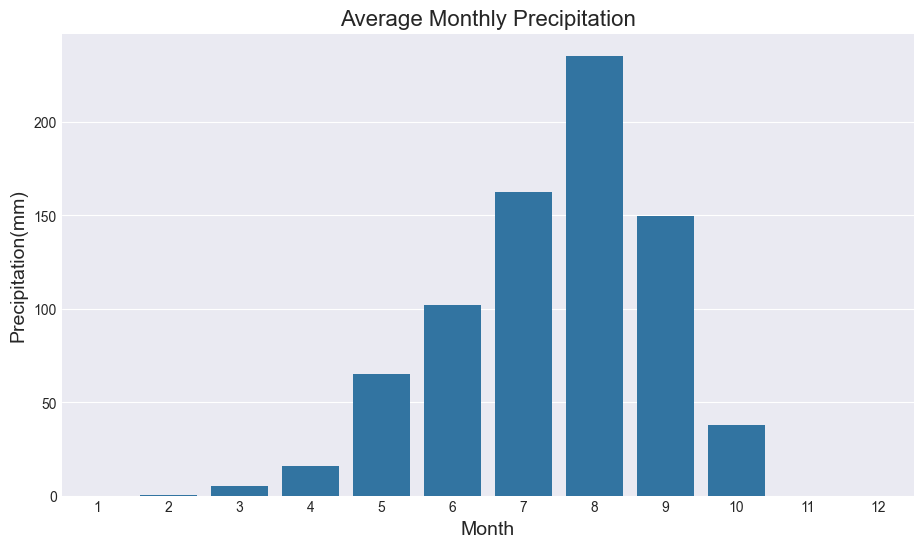

In [27]:
plt.figure(figsize= (11,6))
plt.style.use('seaborn-darkgrid')
color = sb.color_palette()[0]
sb.barplot(dfn, x='MONTH', y=' Precipitation Corrected Sum (mm)', color= color, errorbar=None);
plt.title('Average Monthly Precipitation', size = 16)
plt.xlabel('Month', size = 14)
plt.ylabel('Precipitation(mm)', size = 14);

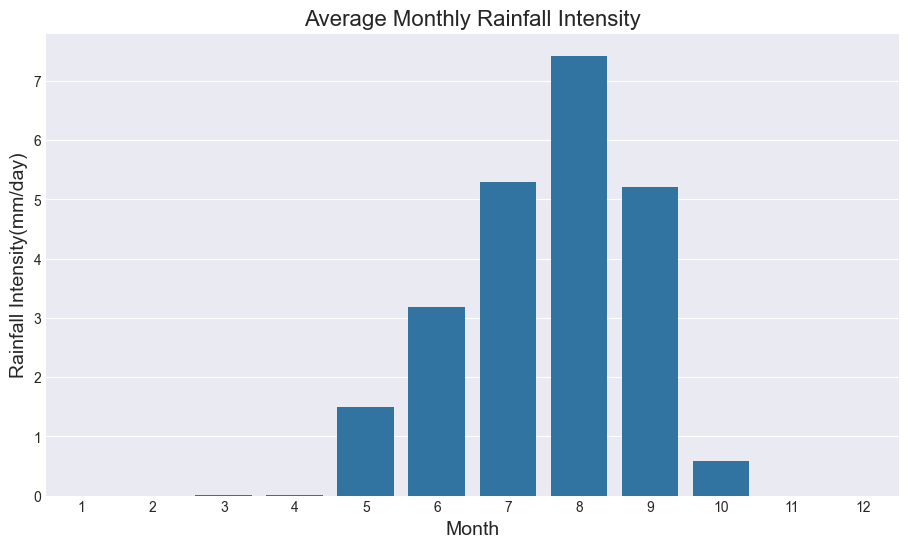

In [28]:
plt.figure(figsize= (11,6))
plt.style.use('seaborn-darkgrid')
color = sb.color_palette()[0]
sb.barplot(dfn, x='MONTH', y='Precipitation Corrected (mm/day)', color= color, errorbar=None);
plt.title('Average Monthly Rainfall Intensity', size = 16)
plt.xlabel('Month', size = 14)
plt.ylabel('Rainfall Intensity(mm/day)', size = 14);

## Dew/Frost Point 

In [29]:
def plotFunc(df, x, y):
    # Plotly Express Line Plot
    fig = px.line(df, x=dfn.index, y=y,
                  labels={y: f'{y}', x: f'{x}'},
                  title=f'{y} Trends')
    fig.update_traces(mode='markers+lines', marker=dict(size=8))
    fig.update_layout(width=1000, height=600)
    fig.show()

    # Seaborn Bar Plot
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-darkgrid')
    color = sb.color_palette()[0]
    sb.barplot(data=df, x=x, y=y, color=color, errorbar=None)
    plt.title(f'Average {y}', size=16)
    plt.xlabel(x, size=14)
    plt.ylabel(f'{y}', size=14)
   


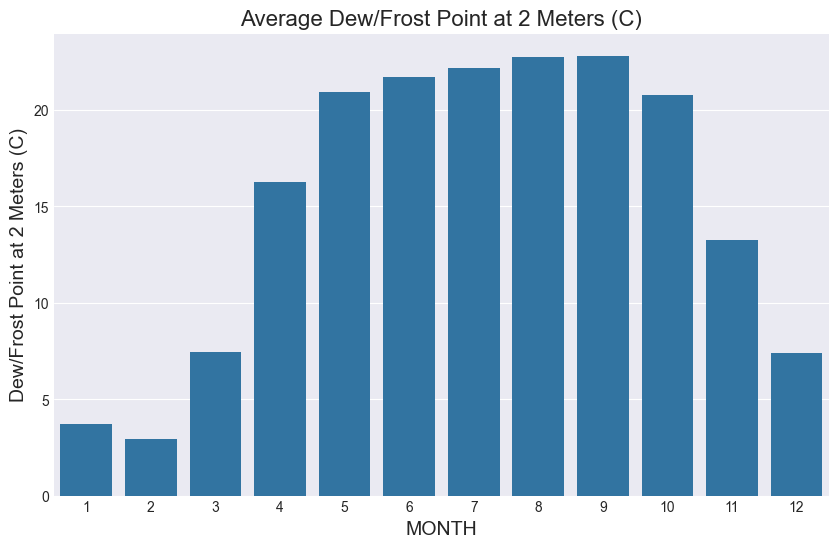

In [30]:
plotFunc(dfn, x = 'MONTH', y = 'Dew/Frost Point at 2 Meters (C)')

In [31]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

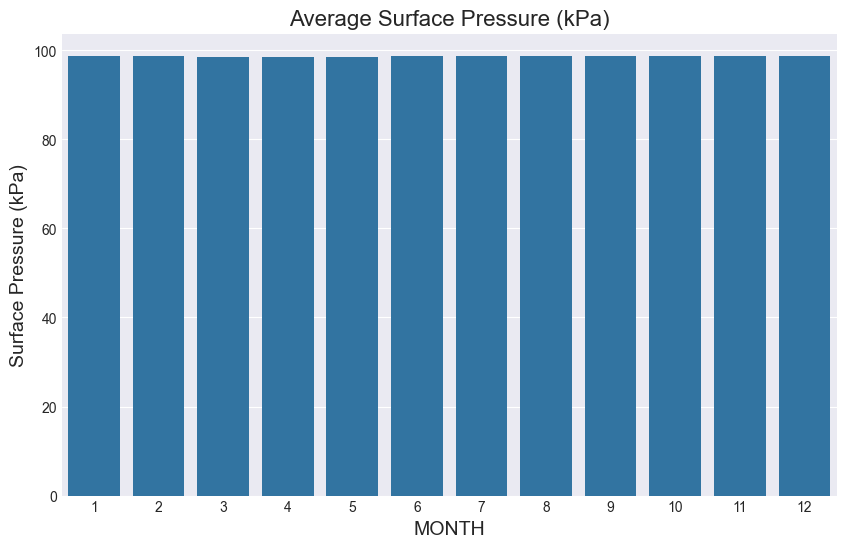

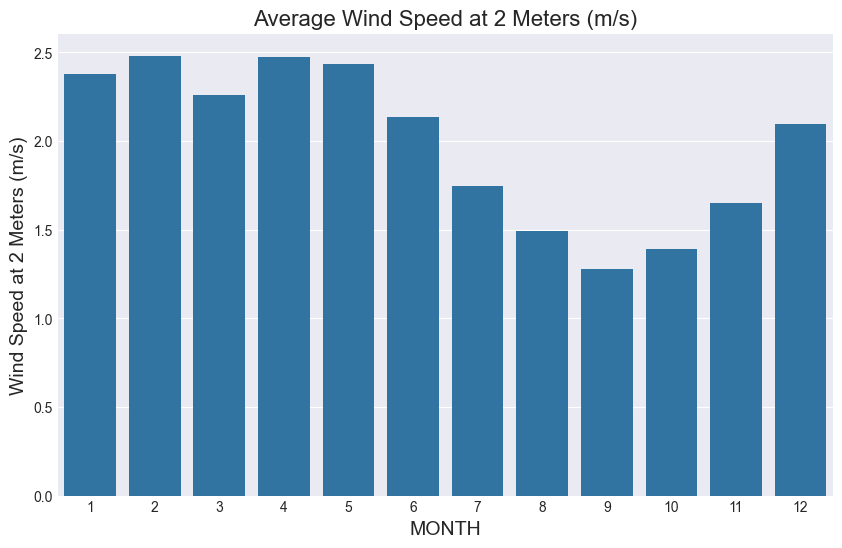

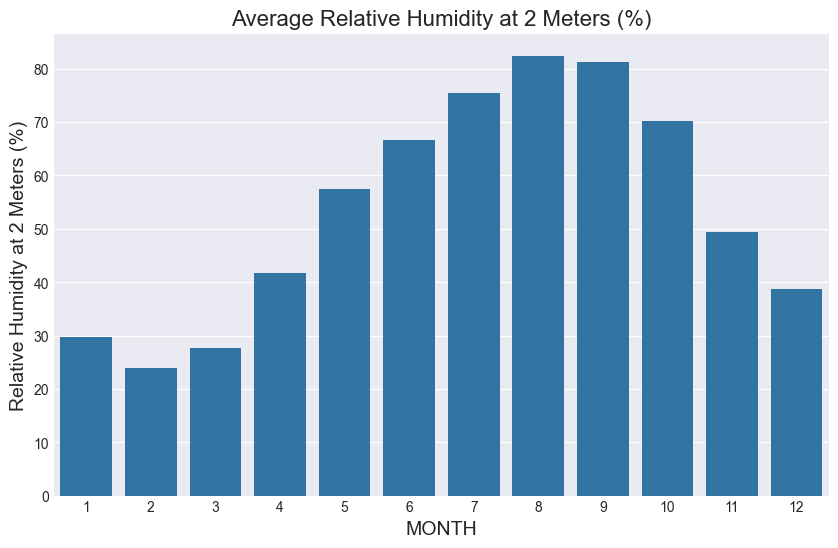

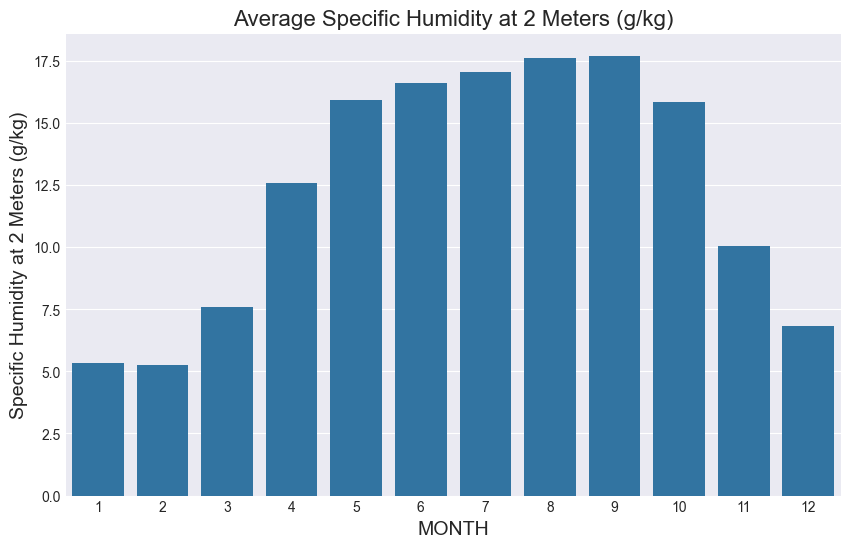

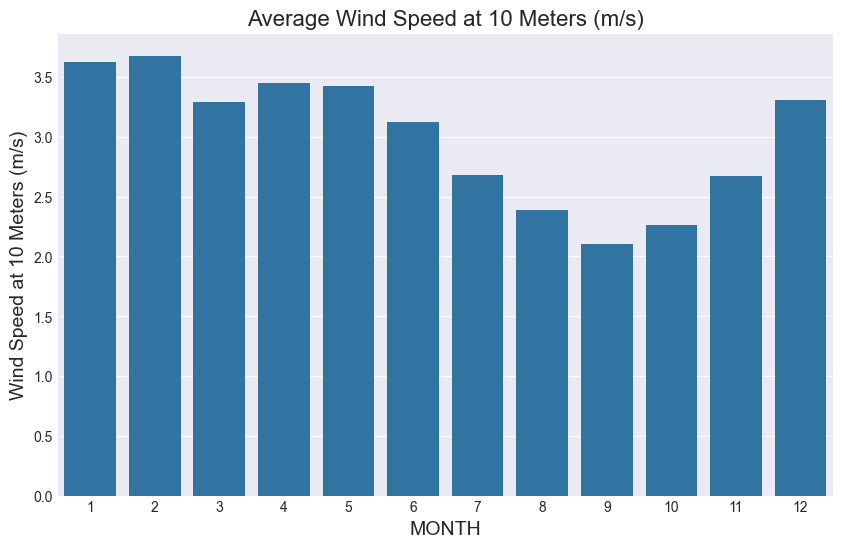

In [32]:
columns = ['Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)','Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Wind Speed at 10 Meters (m/s)']

for column in columns:
    plotFunc(dfn, x = 'MONTH', y = column)

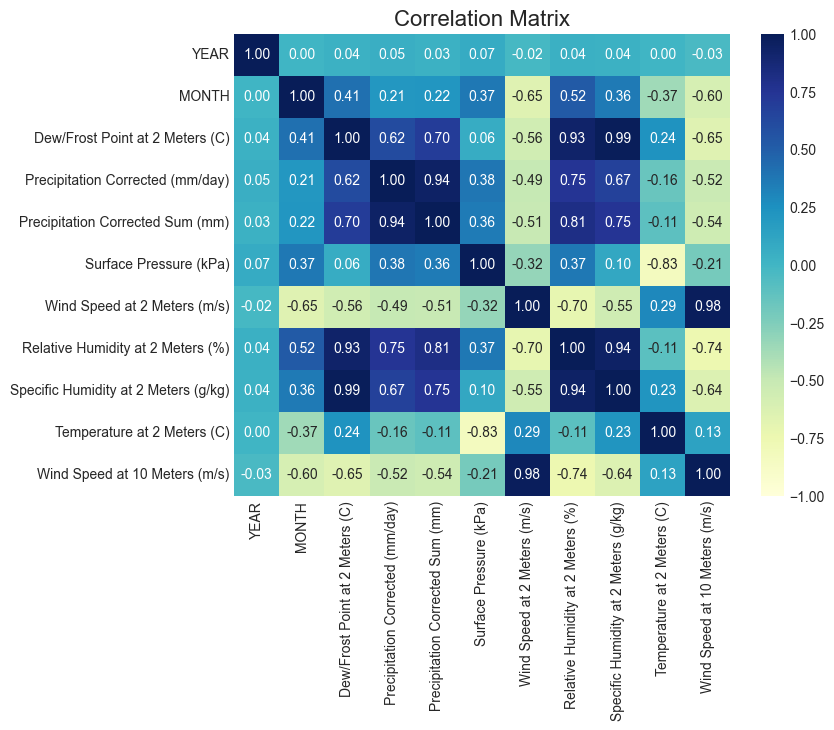

In [33]:
correlation_matrix = dfn.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot= True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix', size = 16);

## Wind Pattern

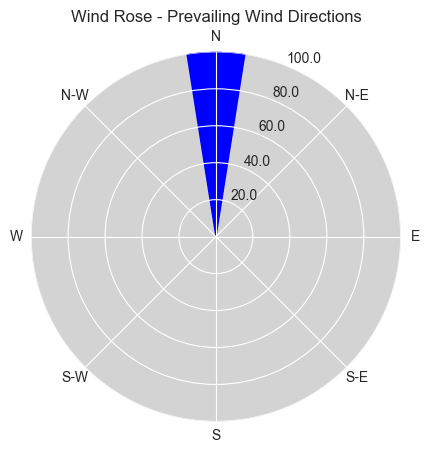

In [34]:
fig_time_series = px.line(dfn, x= dfn.index, y=['Wind Speed at 2 Meters (m/s)', 'Wind Speed at 10 Meters (m/s)'],
                           labels={'value': 'Wind Speed (m/s)', 'variable': 'Wind Speed at'},
                           title='Wind Speed Trends over Time')
fig_time_series.update_layout(width=1100, height=600)
fig_time_series.show()

# Wind Rose Plot for prevailing wind directions
fig_wind_rose, ax = plt.subplots(subplot_kw={'projection': 'windrose'})
cmap = get_cmap('viridis')
ax.bar(dfn['Wind Speed at 2 Meters (m/s)'], dfn['Wind Speed at 10 Meters (m/s)'], normed=True, opening=0.8, 
       edgecolor='white', color='blue', cmap = cmap)
ax.set_facecolor('lightgrey')
ax.set_title('Wind Rose - Prevailing Wind Directions')
plt.show()

- The wind rose above shows that during this particular sampling period the wind blew from the North 100% of the time

## Extreme Temperature

In [35]:
dfx[dfx['Temperature at 2 Meters (C)'].apply(lambda x : x < 22)]

DATE  YEAR MONTH  Dew/Frost Point at 2 Meters (C)  \
59   12/1/1994  1994   DEC                             7.90   
203  12/1/2006  2006   DEC                             5.48   
204   1/1/2007  2007   JAN                             2.25   
216   1/1/2008  2008   JAN                             2.69   
311  12/1/2015  2015   DEC                             5.01   
395  12/1/2022  2022   DEC                            10.50   

     Precipitation Corrected (mm/day)   Precipitation Corrected Sum (mm)  \
59                                0.0                                0.0   
203                               0.0                                0.0   
204                               0.0                                0.0   
216                               0.0                                0.0   
311                               0.0                                0.0   
395                               0.0                                0.0   

     Surface Pressure (kPa)  Wind Speed at 2 Meters (m/s)  \
59                    99.01                          2.48   
203                   98.92                          2.09   
204                   98.96                          2.66   
216                   98.85                          2.80   
311                   99.17                          2.76   
395                   98.87                          2.26   

     Relative Humidity at 2 Meters (%)  Specific Humidity at 2 Meters (g/kg)  \
59                               48.50                                  6.84   
203                              38.06                                  5.86   
204                              30.69                                  4.58   
216                              31.12                                  4.88   
311                              38.62                                  5.62   
395                              52.81                                  8.18   

     Temperature at 2 Meters (C)  Wind Speed at 10 Meters (m/s)  
59                         20.67                           3.94  
203                        21.96                           3.40  
204                        21.52                           4.08  
216                        21.79                           4.19  
311                        20.84                           4.23  
395                        21.67                           3.57

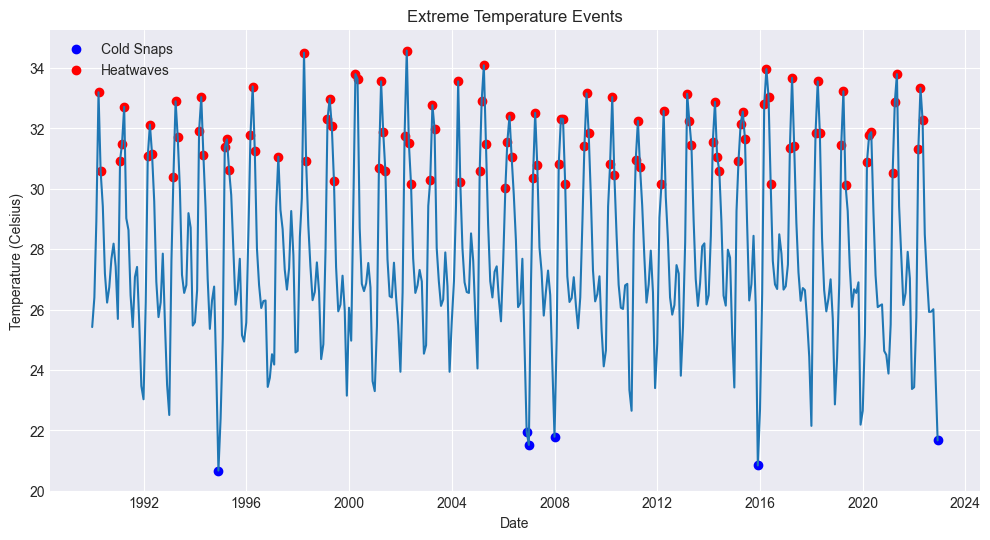

In [36]:
cold = dfn[dfn['Temperature at 2 Meters (C)'].apply(lambda x : x < 22)]
hot = dfn[dfn['Temperature at 2 Meters (C)'].apply(lambda x : x > 30)]

plt.figure(figsize=(12, 6))
plt.plot(dfn.index, dfn['Temperature at 2 Meters (C)'])
plt.scatter(x = cold.index, y = cold['Temperature at 2 Meters (C)'], c = 'b', label='Cold Snaps')
plt.scatter(x = hot.index, y = hot['Temperature at 2 Meters (C)'], c = 'r', label='Heatwaves')
plt.title('Extreme Temperature Events')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


In [37]:
cold = dfn[dfn['Temperature at 2 Meters (C)'] < 22]
hot = dfn[dfn['Temperature at 2 Meters (C)'] > 30]

fig = go.Figure()

fig.add_trace(go.Scatter(x=dfn.index, y=dfn['Temperature at 2 Meters (C)'], 
                         mode='lines', name='Temperature'))
fig.add_trace(go.Scatter(x=cold.index, y=cold['Temperature at 2 Meters (C)'], 
                         mode='markers', marker=dict(color='blue'), 
                         name='Cold Snaps', text='Cold Snaps'))
fig.add_trace(go.Scatter(x=hot.index, y=hot['Temperature at 2 Meters (C)'],
                         mode='markers', marker=dict(color='red'), name='Heatwaves', text='Heatwaves'))

fig.update_layout(
    title='Extreme Temperature Events',
    xaxis_title='Date',
    yaxis_title='Temperature (Celsius)',
    legend_title='Event Type',
    height=600,
    width=1000
)

fig.show()


## Anomalies

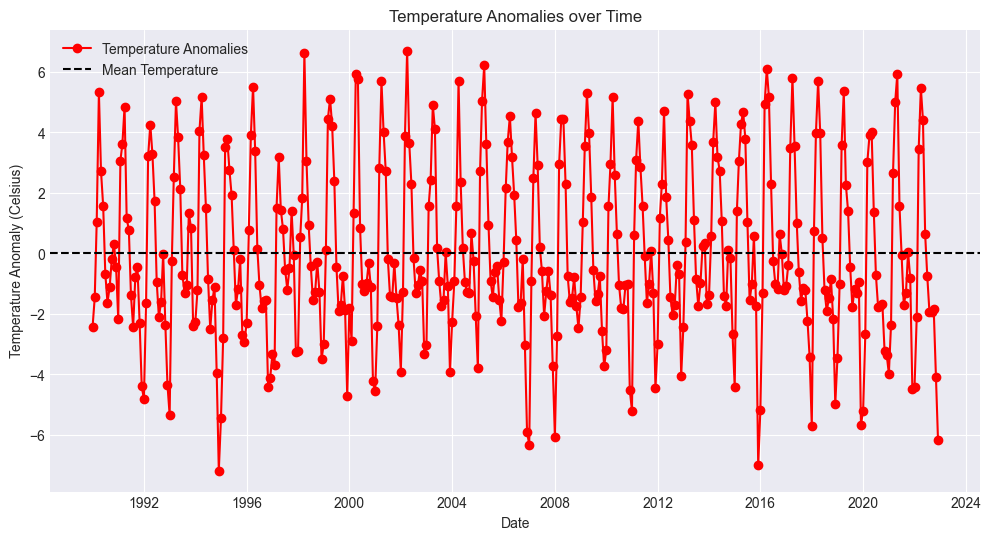

In [38]:
# Analyze Temperature Anomalies
mean_temperature = dfn['Temperature at 2 Meters (C)'].mean()
temperature_anomalies = dfn['Temperature at 2 Meters (C)'] - mean_temperature

# Visualize Temperature Anomalies
plt.figure(figsize=(12, 6))
plt.plot(dfn.index, temperature_anomalies, label='Temperature Anomalies', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Mean Temperature')
plt.title('Temperature Anomalies over Time')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.legend()
plt.show()

In [39]:
dfn.columns

Index(['YEAR', 'MONTH', 'Dew/Frost Point at 2 Meters (C)',
       'Precipitation Corrected (mm/day)', ' Precipitation Corrected Sum (mm)',
       'Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)'],
      dtype='object')

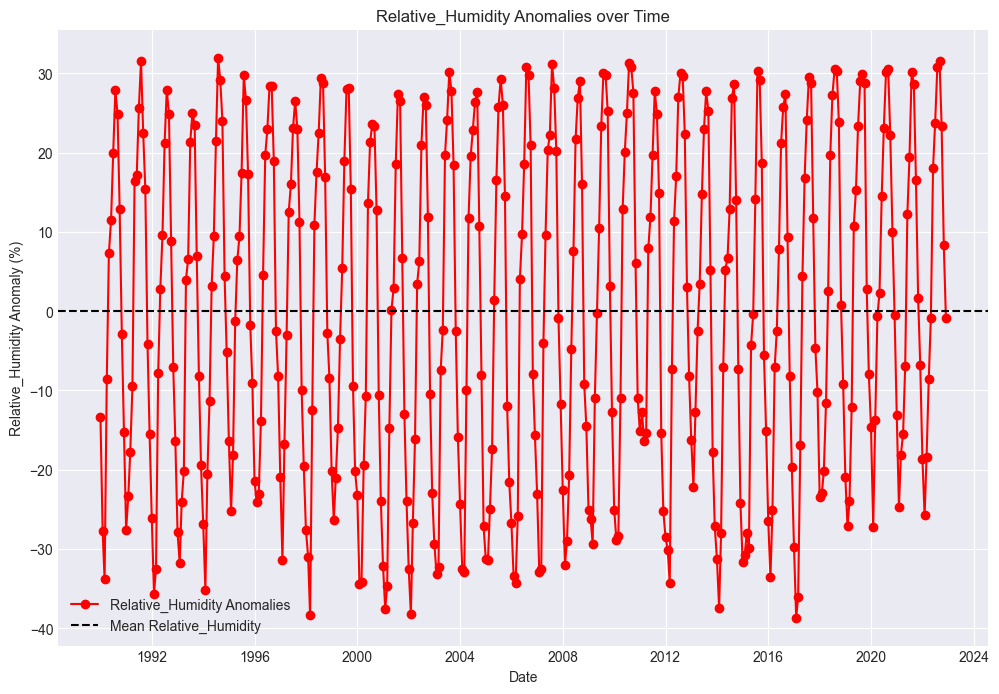

In [40]:
# Analyze Humidity Anomalies
mean_Relative_Humidity = dfn['Relative Humidity at 2 Meters (%)'].mean()
Relative_Humidity_anomalies = dfn['Relative Humidity at 2 Meters (%)'] - mean_Relative_Humidity

# Visualize Temperature Anomalies
plt.figure(figsize=(12, 8))
plt.plot(dfn.index, Relative_Humidity_anomalies, label='Relative_Humidity Anomalies', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Mean Relative_Humidity')
plt.title('Relative_Humidity Anomalies over Time')
plt.xlabel('Date')
plt.ylabel('Relative_Humidity Anomaly (%)')
plt.legend()
plt.show()

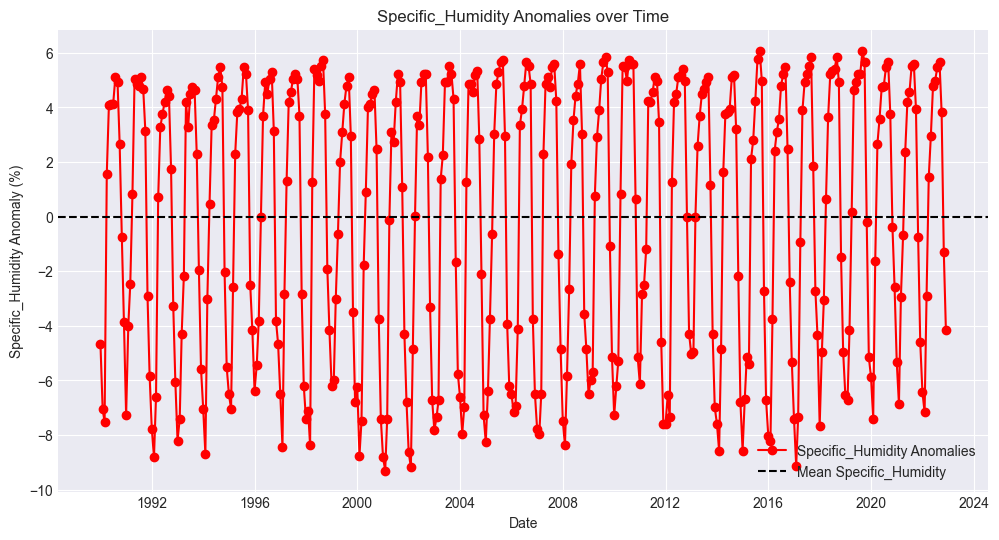

In [41]:
# Analyze Humidity Anomalies
mean_Specific_Humidity = dfn['Specific Humidity at 2 Meters (g/kg)'].mean()
Specific_Humidity_anomalies = dfn['Specific Humidity at 2 Meters (g/kg)'] - mean_Specific_Humidity

# Visualize Humidity Anomalies
plt.figure(figsize=(12, 6))
plt.plot(dfn.index, Specific_Humidity_anomalies, label='Specific_Humidity Anomalies', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Mean Specific_Humidity')
plt.title('Specific_Humidity Anomalies over Time')
plt.xlabel('Date')
plt.ylabel('Specific_Humidity Anomaly (%)')
plt.legend()
plt.show()

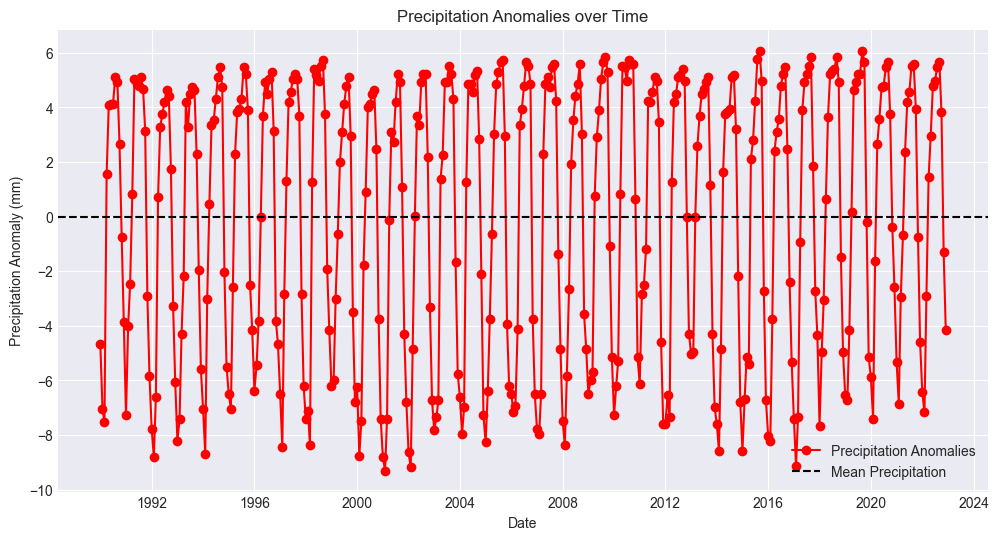

In [42]:
# Analyze Precipitation Anomalies
mean_Precipitation = dfn[' Precipitation Corrected Sum (mm)'].mean()
Precipitation_anomalies = dfn[' Precipitation Corrected Sum (mm)'] - mean_Precipitation

# Visualize Humidity Anomalies
plt.figure(figsize=(12, 6))
plt.plot(dfn.index, Specific_Humidity_anomalies, label='Precipitation Anomalies', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Mean Precipitation')
plt.title('Precipitation Anomalies over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation Anomaly (mm)')
plt.legend()
plt.show()

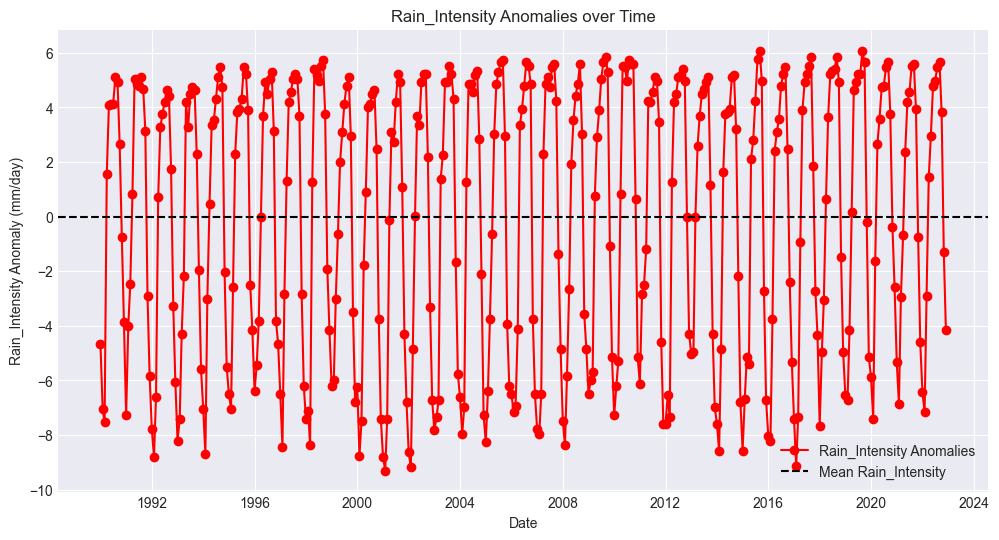

In [43]:
# Analyze Rain_Intensity Anomalies
mean_Rain_Intensity = dfn['Precipitation Corrected (mm/day)'].mean()
Rain_Intensity_anomalies = dfn['Precipitation Corrected (mm/day)'] - mean_Rain_Intensity

# Visualize Humidity Anomalies
plt.figure(figsize=(12, 6))
plt.plot(dfn.index, Specific_Humidity_anomalies, label='Rain_Intensity Anomalies', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Mean Rain_Intensity')
plt.title('Rain_Intensity Anomalies over Time')
plt.xlabel('Date')
plt.ylabel('Rain_Intensity Anomaly (mm/day)')
plt.legend()
plt.show()

## Climate Trends over Year

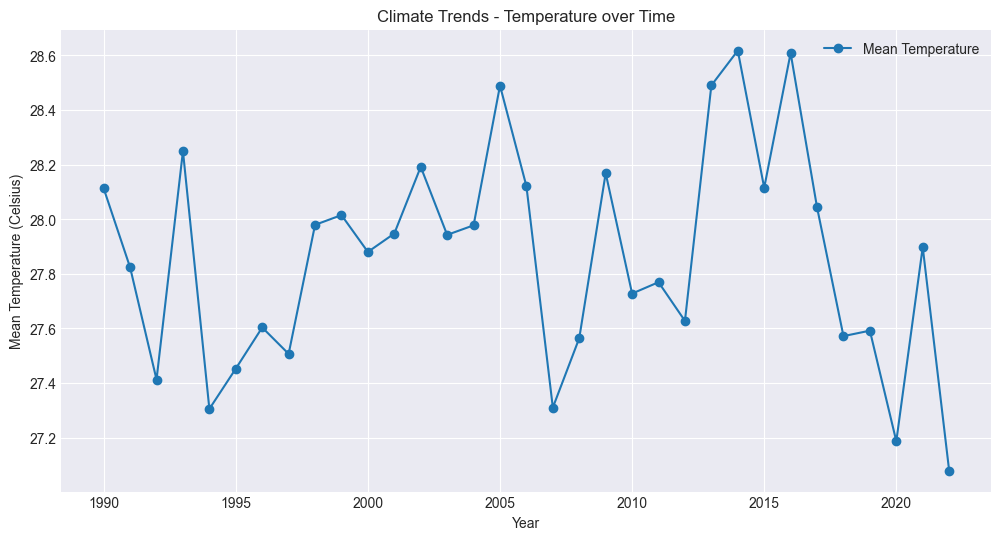

In [44]:
# Group data by year to analyze climate trends
dfx['DATE'] = pd.to_datetime(dfx['DATE'])
dfx['YEAR'] = dfx['DATE'].dt.year
dfi = dfx.drop(columns = ['MONTH'])
grouped_by_year = dfi.groupby('YEAR').mean()

# Visualize Temperature Trends
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_year.index, grouped_by_year['Temperature at 2 Meters (C)'], marker='o', label='Mean Temperature')
plt.title('Climate Trends - Temperature over Time')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (Celsius)')
plt.legend()
plt.show()

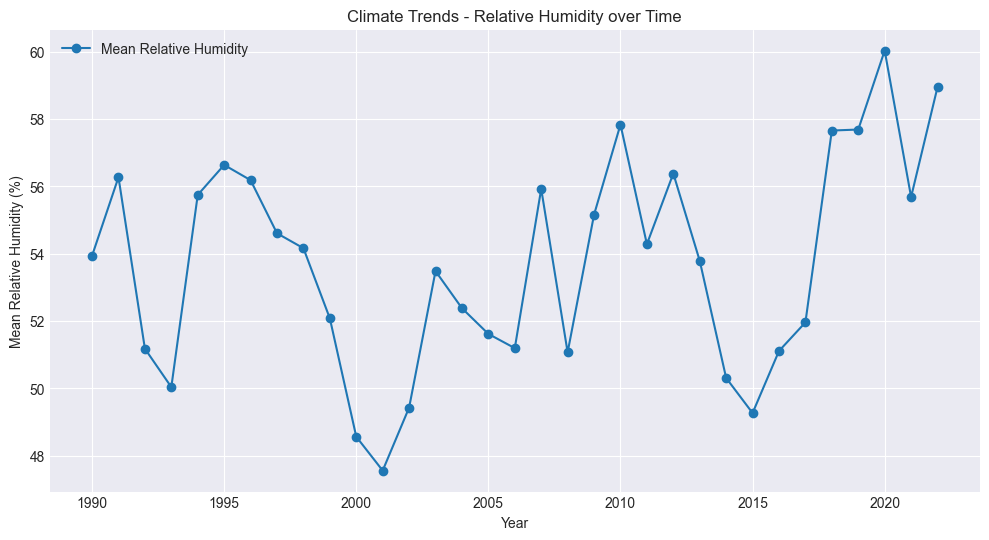

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_year.index, grouped_by_year['Relative Humidity at 2 Meters (%)'], marker='o', 
         label='Mean Relative Humidity')
plt.title('Climate Trends - Relative Humidity over Time')
plt.xlabel('Year')
plt.ylabel('Mean Relative Humidity (%)')
plt.legend()
plt.show()

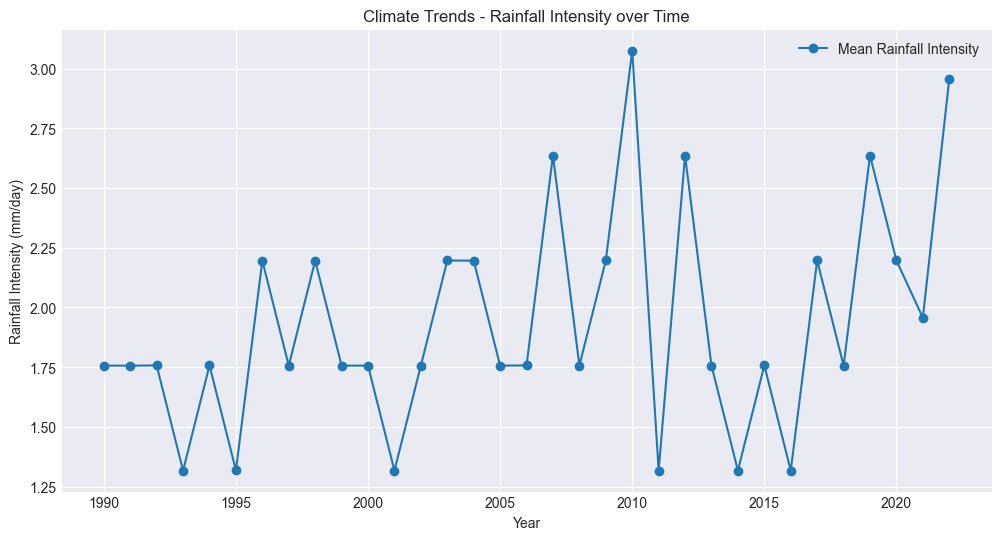

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_year.index, grouped_by_year['Precipitation Corrected (mm/day)'], marker='o', 
         label='Mean Rainfall Intensity')
plt.title('Climate Trends - Rainfall Intensity over Time')
plt.xlabel('Year')
plt.ylabel('Rainfall Intensity (mm/day)')
plt.legend()
plt.show()

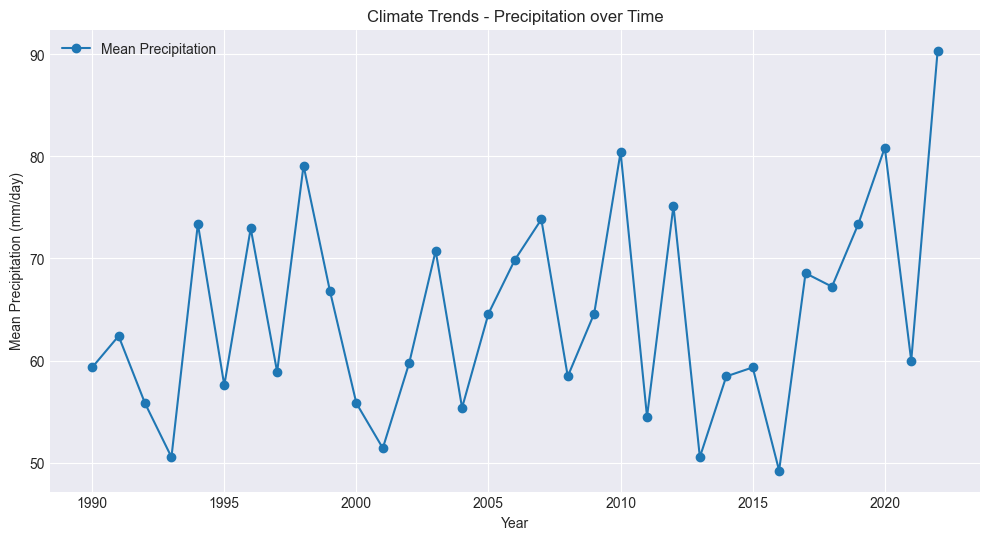

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_year.index, grouped_by_year[' Precipitation Corrected Sum (mm)'], marker='o', label='Mean Precipitation')
plt.title('Climate Trends - Precipitation over Time')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation (mm/day)')
plt.legend()
plt.show()


## Relationship between temperature and precipitation

-0.11347859747570449


Text(0.5, 0, 'Temperature')

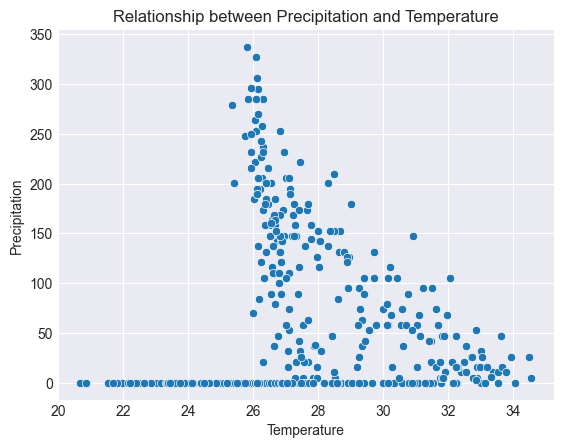

In [48]:
sb.scatterplot(data= dfn, x= 'Temperature at 2 Meters (C)', y =' Precipitation Corrected Sum (mm)')
print(dfn['Temperature at 2 Meters (C)'].corr(dfn[' Precipitation Corrected Sum (mm)']))
plt.title('Relationship between Precipitation and Temperature')
plt.ylabel('Precipitation')
plt.xlabel('Temperature')

## Flooding Condition

Text(0.5, 0, 'Surface Pressure (kPa)')

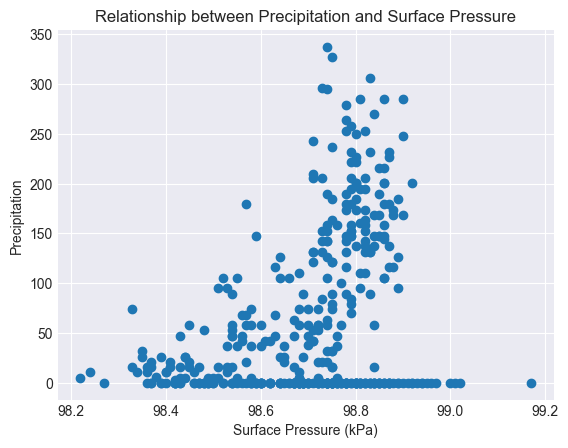

In [49]:
# Plotting the relationship between Precipitation Corrected and Surface Pressure
plt.scatter(y = dfn[' Precipitation Corrected Sum (mm)'], x = dfn['Surface Pressure (kPa)'])
plt.title('Relationship between Precipitation and Surface Pressure')
plt.ylabel('Precipitation')
plt.xlabel('Surface Pressure (kPa)')

Text(0.5, 0, 'Surface Pressure')

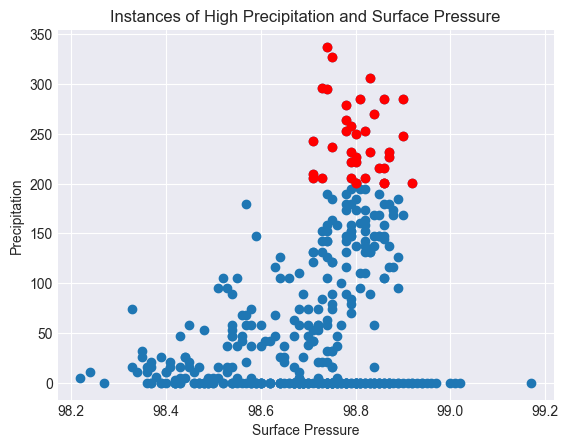

In [50]:
threshold_precipitation =  200
high_precipitation_events = dfn[dfn[' Precipitation Corrected Sum (mm)'] > threshold_precipitation]

# Plotting instances of high precipitation
plt.scatter( y = dfn[' Precipitation Corrected Sum (mm)'], x = dfn['Surface Pressure (kPa)'], label='Normal')
plt.scatter(y = high_precipitation_events[' Precipitation Corrected Sum (mm)'], 
            x = high_precipitation_events['Surface Pressure (kPa)'],
            color='red', label='High Precipitation Events')
plt.title('Instances of High Precipitation and Surface Pressure')
plt.ylabel('Precipitation')
plt.xlabel('Surface Pressure')

Text(0.5, 0, 'Surface Pressure (kPa)')

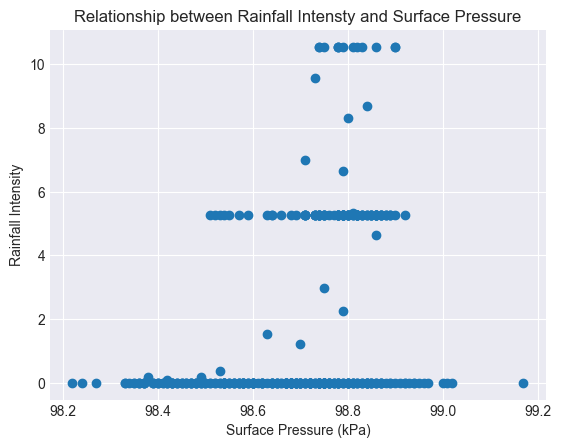

In [51]:
plt.scatter(y = dfn['Precipitation Corrected (mm/day)'], x = dfn['Surface Pressure (kPa)'])
plt.title('Relationship between Rainfall Intensty and Surface Pressure')
plt.ylabel('Rainfall Intensity')
plt.xlabel('Surface Pressure (kPa)')

In [52]:
low_Precipitation = dfn[dfn[' Precipitation Corrected Sum (mm)'] < 50]
high_Precipitation = dfn[dfn[' Precipitation Corrected Sum (mm)'] > 200]
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfn.index, y=dfn[' Precipitation Corrected Sum (mm)'], mode='lines', name='All Data'))
# Scatter plot for low relative humidity
fig.add_trace(go.Scatter(x=low_Precipitation.index, y=low_Precipitation[' Precipitation Corrected Sum (mm)'],
                         mode='markers', marker=dict(color='blue'), name='low Precipitation'))
# Scatter plot for high relative humidity
fig.add_trace(go.Scatter(x=high_Precipitation.index, y=high_Precipitation[' Precipitation Corrected Sum (mm)'],
                         mode='markers', marker=dict(color='red'), name='high Precipitation'))
fig.update_layout(
    title='Precipitation Events',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Precipitation'),
    legend=dict(x=1, y=0, traceorder='normal')
)

fig.show()

## Drought Condition

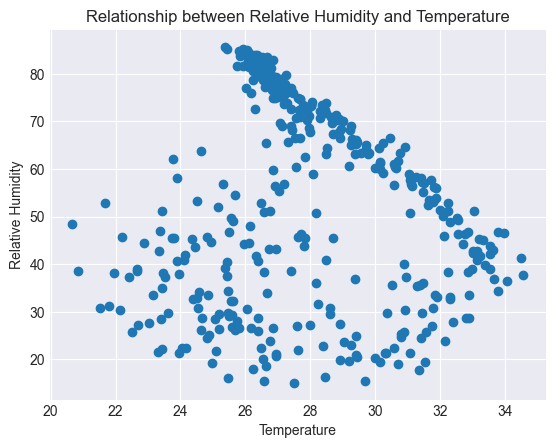

In [53]:
plt.scatter(y = dfn['Relative Humidity at 2 Meters (%)'], x = dfn['Temperature at 2 Meters (C)'])
plt.title('Relationship between Relative Humidity and Temperature')
plt.ylabel('Relative Humidity')
plt.xlabel('Temperature');

In [54]:
dfn['Relative Humidity at 2 Meters (%)'].corr(dfn['Temperature at 2 Meters (C)'])

-0.10646791808809801

In [55]:

low_relative = dfn[dfn['Relative Humidity at 2 Meters (%)'] < 30]
high_relative = dfn[dfn['Relative Humidity at 2 Meters (%)'] > 60]
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfn.index, y=dfn['Relative Humidity at 2 Meters (%)'], mode='lines', name='All Data'))
# Scatter plot for low relative humidity
fig.add_trace(go.Scatter(x=low_relative.index, y=low_relative['Relative Humidity at 2 Meters (%)'],
                         mode='markers', marker=dict(color='blue'), name='Low Relative Humidity'))
# Scatter plot for high relative humidity
fig.add_trace(go.Scatter(x=high_relative.index, y=high_relative['Relative Humidity at 2 Meters (%)'],
                         mode='markers', marker=dict(color='red'), name='High Relative Humidity'))
fig.update_layout(
    title='Relative Humidity Events',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Relative Humidity'),
    legend=dict(x=1, y=0, traceorder='normal')
)

fig.show()

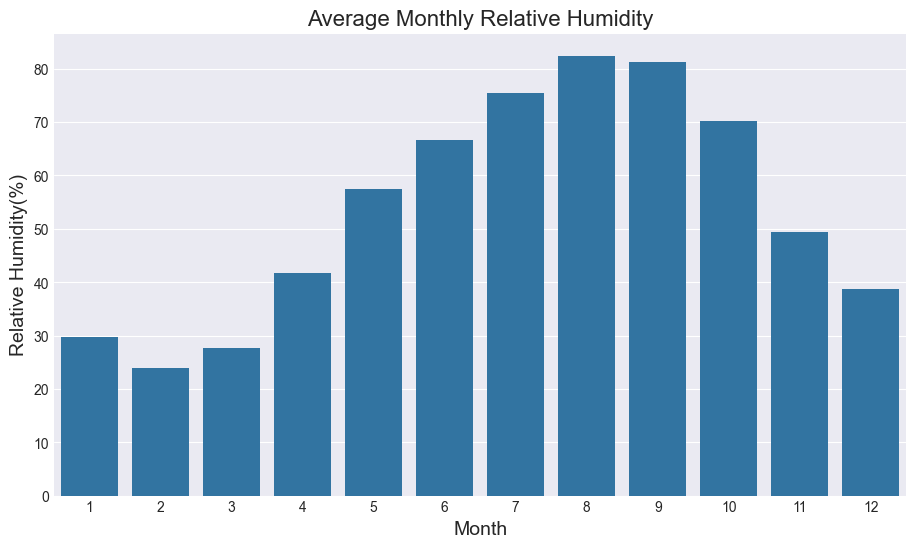

In [56]:
plt.figure(figsize= (11,6))
plt.style.use('seaborn-darkgrid')
color = sb.color_palette()[0]
sb.barplot(dfn, x='MONTH', y= 'Relative Humidity at 2 Meters (%)', color= color, errorbar=None);
plt.title('Average Monthly Relative Humidity', size = 16)
plt.xlabel('Month', size = 14)
plt.ylabel('Relative Humidity(%)', size = 14);

In [57]:
dfn['Precipitation Corrected (mm/day)'].min()

0.0

High rainfall intensity: 5 mm/day or more
Low rainfall intensity: 3 mm/day or less  

In [58]:
''

''

In [59]:
#mapping flood condition
flood = (dfn['Precipitation Corrected (mm/day)'] >= 5) & \
                  (dfn[' Precipitation Corrected Sum (mm)'] >= 200) & \
                  (dfn['Relative Humidity at 2 Meters (%)'] >= 60)

# mapping drought condition
drought = (dfn['Precipitation Corrected (mm/day)'] <= 3) & \
                    (dfn[' Precipitation Corrected Sum (mm)'] <= 50) & \
                    (dfn['Relative Humidity at 2 Meters (%)'] <= 30)


In [60]:
dfn['class'] = 'normal'
dfn.loc[flood, 'class'] = 'flood'
dfn.loc[drought, 'class'] = 'drought'
dfn

YEAR  MONTH  Dew/Frost Point at 2 Meters (C)  \
DATE                                                       
1990-01-01  1990      1                             9.31   
1990-02-01  1990      2                             3.55   
1990-03-01  1990      3                             1.75   
1990-04-01  1990      4                            18.38   
1990-05-01  1990      5                            21.51   
...          ...    ...                              ...   
2022-08-01  2022      8                            22.95   
2022-09-01  2022      9                            23.13   
2022-10-01  2022     10                            21.25   
2022-11-01  2022     11                            15.14   
2022-12-01  2022     12                            10.50   

            Precipitation Corrected (mm/day)  \
DATE                                           
1990-01-01                              0.00   
1990-02-01                              0.00   
1990-03-01                              0.00   
1990-04-01                              0.00   
1990-05-01                              0.00   
...                                      ...   
2022-08-01                              9.56   
2022-09-01                              8.32   
2022-10-01                              2.26   
2022-11-01                              0.00   
2022-12-01                              0.00   

             Precipitation Corrected Sum (mm)  Surface Pressure (kPa)  \
DATE                                                                    
1990-01-01                               0.00                   98.69   
1990-02-01                               0.00                   98.75   
1990-03-01                               0.00                   98.68   
1990-04-01                              15.82                   98.36   
1990-05-01                              73.83                   98.58   
...                                       ...                     ...   
2022-08-01                             296.34                   98.73   
2022-09-01                             249.74                   98.80   
2022-10-01                              70.09                   98.79   
2022-11-01                               0.00                   98.80   
2022-12-01                               0.00                   98.87   

            Wind Speed at 2 Meters (m/s)  Relative Humidity at 2 Meters (%)  \
DATE                                                                          
1990-01-01                          2.15                              40.38   
1990-02-01                          2.66                              25.94   
1990-03-01                          2.80                              19.88   
1990-04-01                          2.73                              45.19   
1990-05-01                          2.48                              61.00   
...                                  ...                                ...   
2022-08-01                          1.58                              84.50   
2022-09-01                          1.24                              85.31   
2022-10-01                          1.40                              77.12   
2022-11-01                          1.73                              62.06   
2022-12-01                          2.26                              52.81   

            Specific Humidity at 2 Meters (g/kg)  Temperature at 2 Meters (C)  \
DATE                                                                            
1990-01-01                                  7.69                        25.42   
1990-02-01                                  5.31                        26.40   
1990-03-01                                  4.82                        28.91   
1990-04-01                                 13.92                        33.19   
1990-05-01                                 16.42                        30.58   
...                                          ...             

In [61]:
dfn.groupby('class').size()

class
drought     76
flood       37
normal     283
dtype: int64



## Predicting flood Model

In [62]:
dfn.describe().T

count         mean        std      min  \
YEAR                                  396.0  2006.000000   9.533950  1990.00   
MONTH                                 396.0     6.500000   3.456419     1.00   
Dew/Frost Point at 2 Meters (C)       396.0    15.188788   7.876607    -3.27   
Precipitation Corrected (mm/day)      396.0     1.932500   2.918556     0.00   
 Precipitation Corrected Sum (mm)     396.0    64.521010  82.393660     0.00   
Surface Pressure (kPa)                396.0    98.695379   0.155370    98.22   
Wind Speed at 2 Meters (m/s)          396.0     1.984268   0.480448     1.15   
Relative Humidity at 2 Meters (%)     396.0    53.705682  21.279286    15.06   
Specific Humidity at 2 Meters (g/kg)  396.0    12.352803   4.986532     3.05   
Temperature at 2 Meters (C)           396.0    27.859874   2.871941    20.67   
Wind Speed at 10 Meters (m/s)         396.0     2.999672   0.606763     1.90   

                                            25%       50%        75%      max  
YEAR                                  1998.0000  2006.000  2014.0000  2022.00  
MONTH                                    3.7500     6.500     9.2500    12.00  
Dew/Frost Point at 2 Meters (C)          8.2100    18.980    22.2600    23.51  
Precipitation Corrected (mm/day)         0.0000     0.000     5.2700    10.55  
 Precipitation Corrected Sum (mm)        0.0000    18.455   126.5600   337.50  
Surface Pressure (kPa)                  98.5900    98.740    98.8025    99.17  
Wind Speed at 2 Meters (m/s)             1.5700     2.020     2.3600     3.33  
Relative Humidity at 2 Meters (%)       34.2950    53.410    74.2000    85.69  
Specific Humidity at 2 Meters (g/kg)     7.3900    14.250    17.1050    18.43  
Temperature at 2 Meters (C)             26.1300    27.210    30.1250    34.57  
Wind Speed at 10 Meters (m/s)            2.5025     3.040     3.4000     4.80

<Figure size 2500x2000 with 0 Axes>

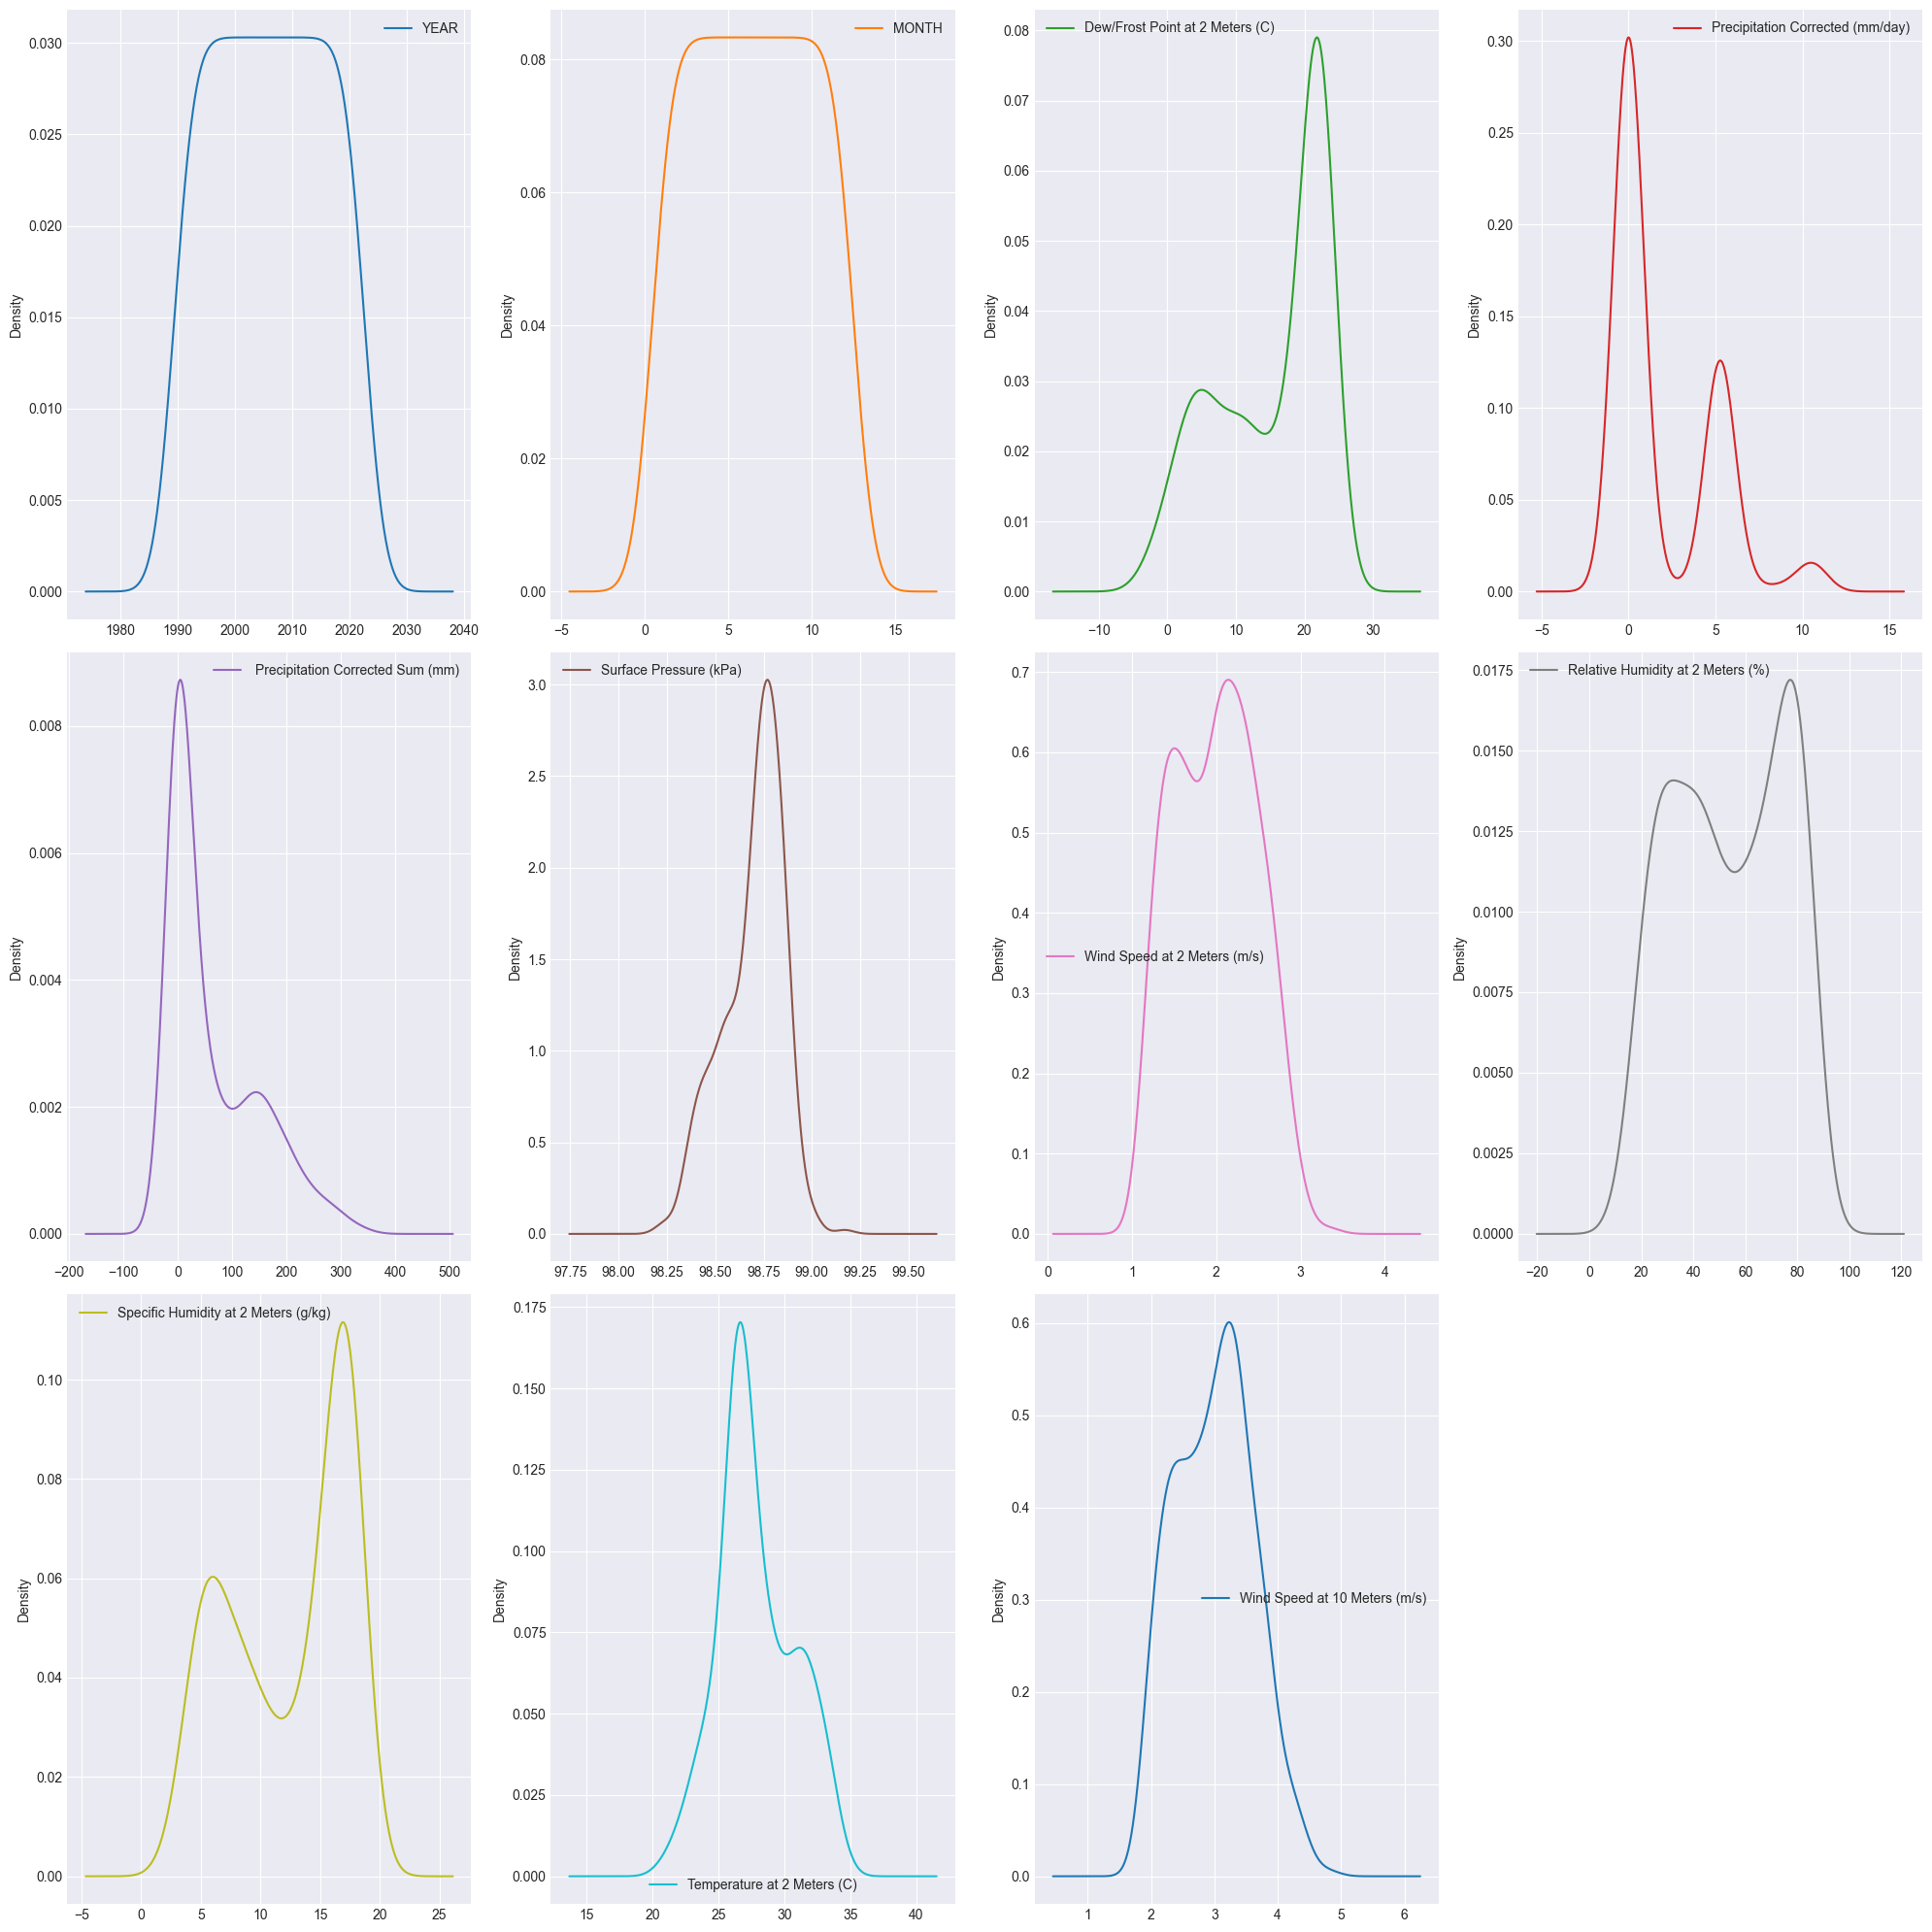

In [63]:
plt.figure(figsize=(25, 20), dpi= 100)
dfn.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

<Figure size 2500x2000 with 0 Axes>

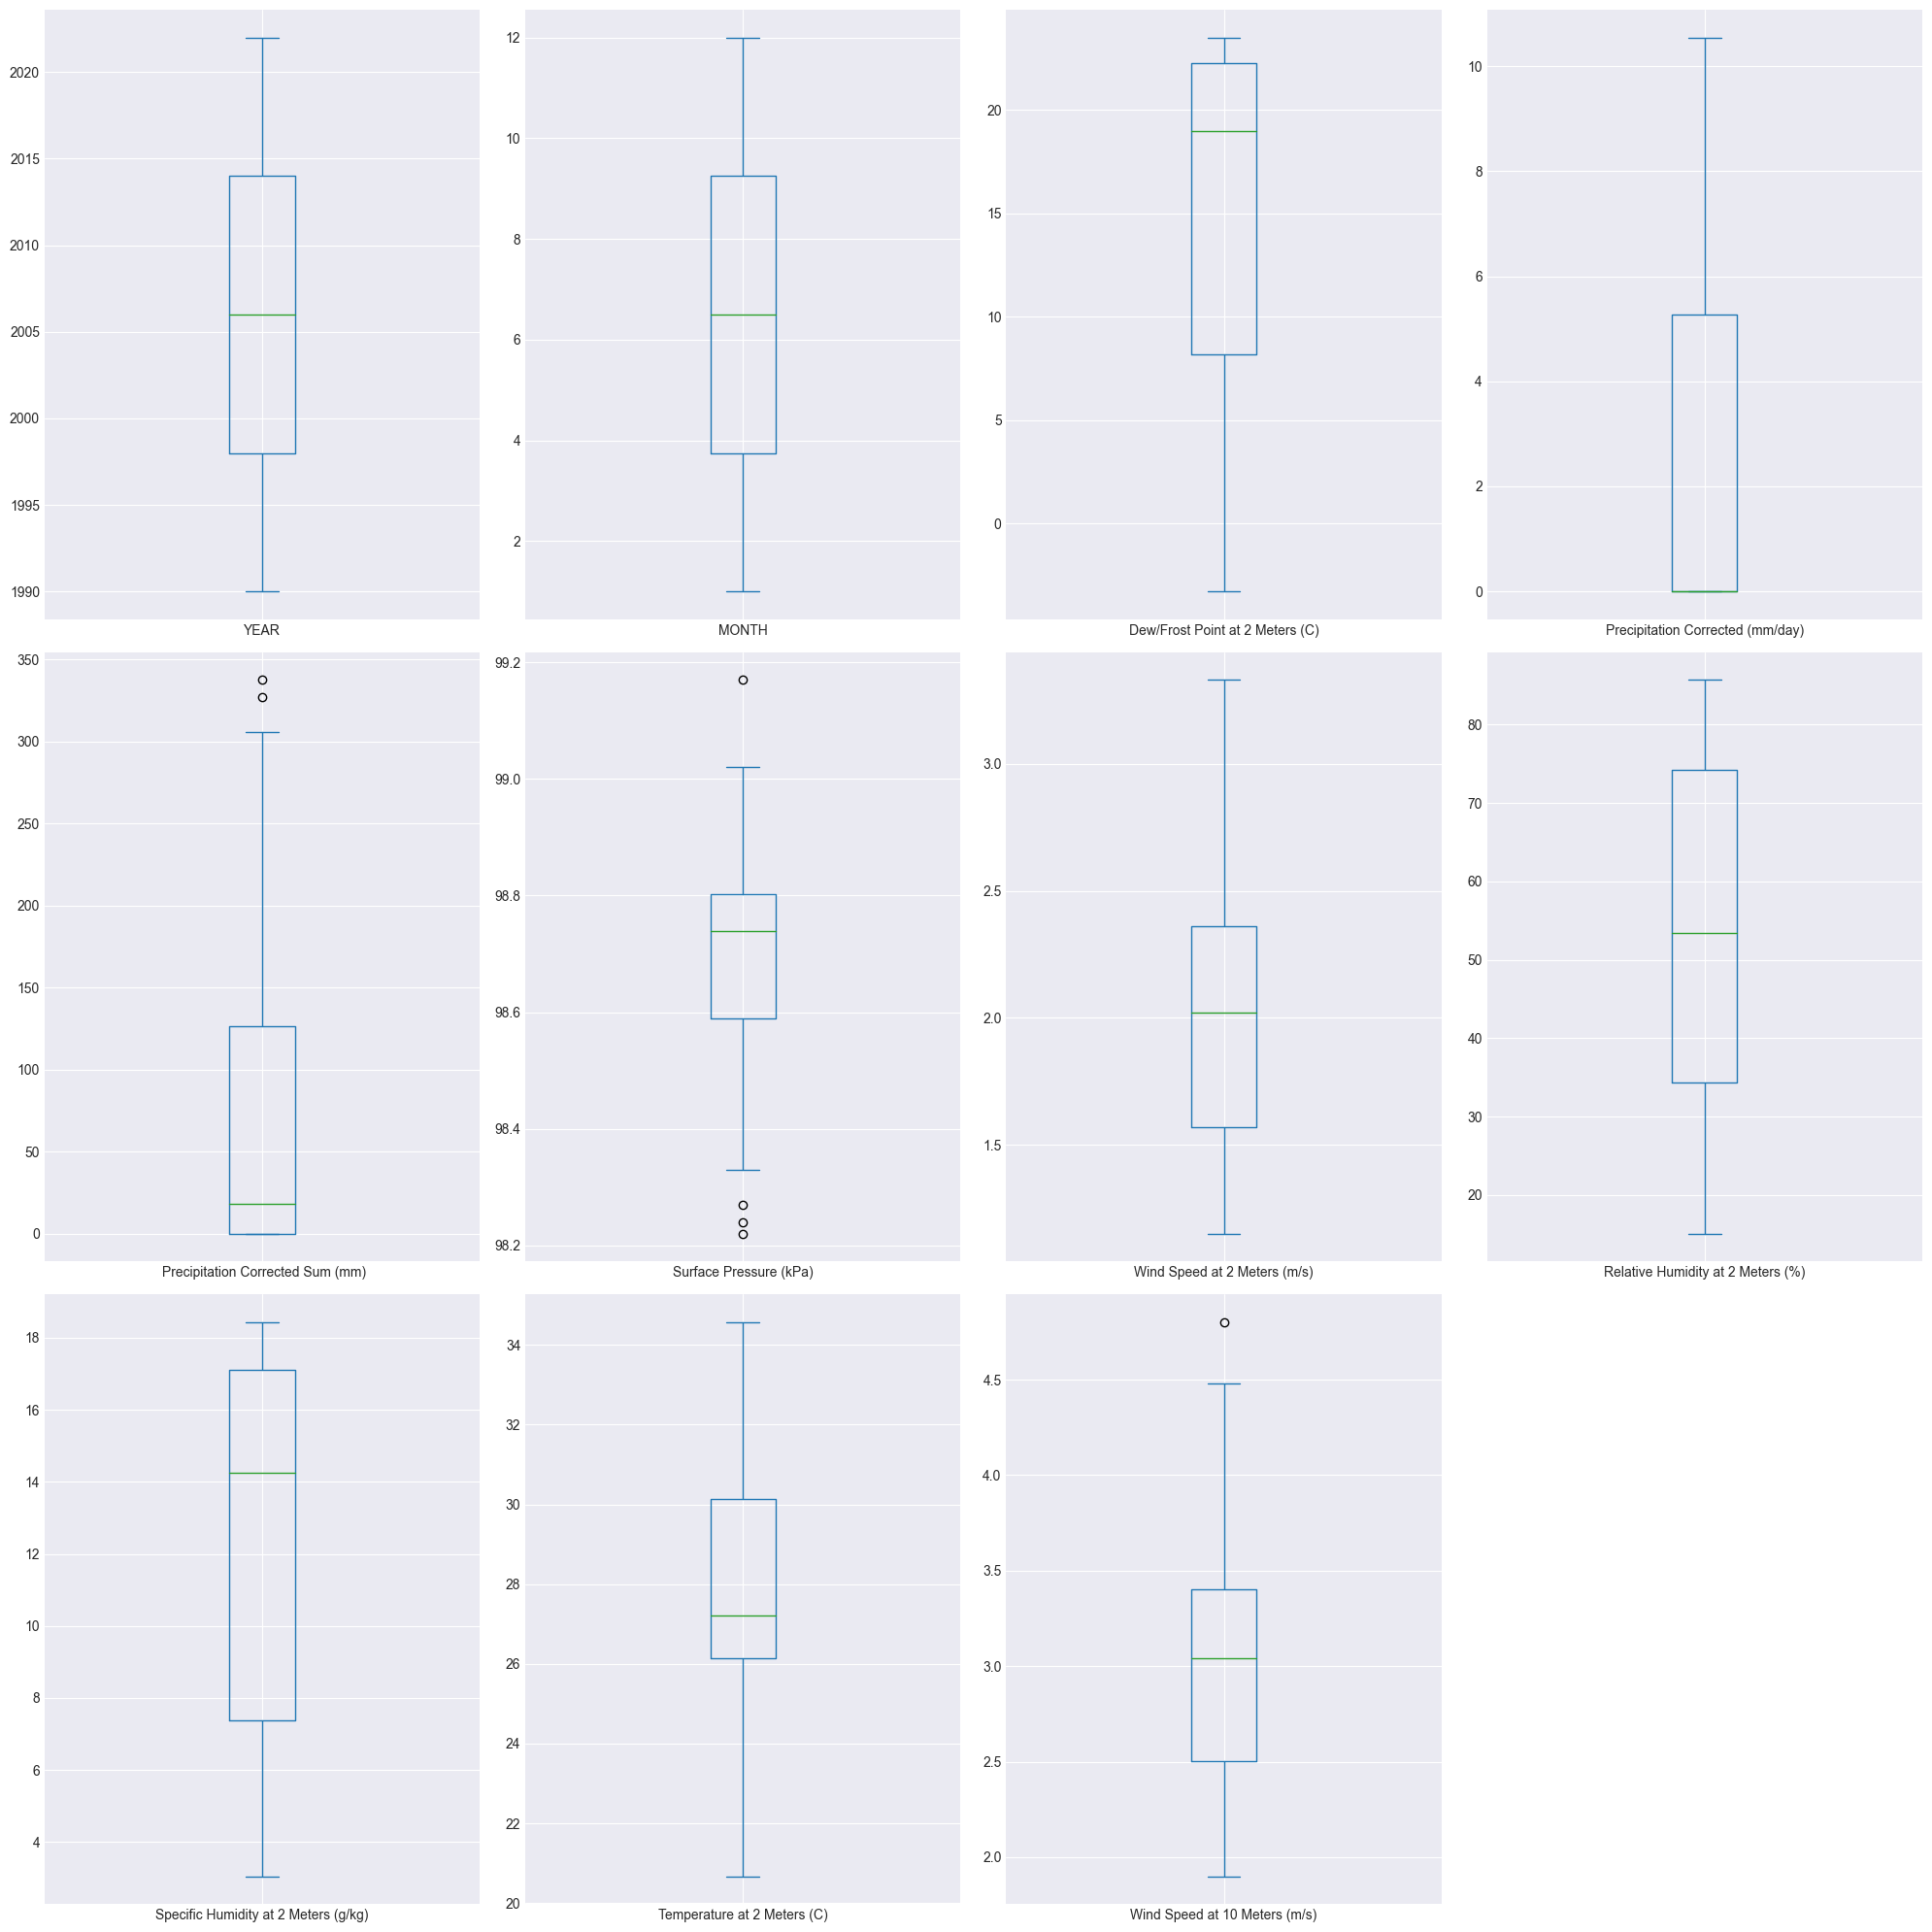

In [64]:
plt.figure(figsize=(25, 20), dpi= 100)
dfn.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

In [65]:
features = [f for f in dfn.columns if f != 'class']
target = [t for t in dfn.columns if t == 'class']



In [66]:
dfn.groupby('class').size()

class
drought     76
flood       37
normal     283
dtype: int64

In [67]:
feature_df = dfn[features]
label_df = dfn[target]

In [68]:
dfn.columns.get_loc('class') 

11

In [69]:
oversample = SMOTENC(sampling_strategy='auto', categorical_features=[0])
tfrm_features, tfrm_target = oversample.fit_resample(feature_df, label_df)

In [70]:
print(f'new label count: {tfrm_target.value_counts()}')
print(f'old label count: {label_df.value_counts()}')

new label count: class  
drought    283
flood      283
normal     283
Name: count, dtype: int64
old label count: class  
normal     283
drought     76
flood       37
Name: count, dtype: int64


In [71]:
dfi = pd.concat([tfrm_features,tfrm_target],axis=1, join='outer')
dfi

YEAR  MONTH  Dew/Frost Point at 2 Meters (C)  \
0    1990      1                         9.310000   
1    1990      2                         3.550000   
2    1990      3                         1.750000   
3    1990      4                        18.380000   
4    1990      5                        21.510000   
..    ...    ...                              ...   
844  2015      8                        23.138705   
845  2012      8                        22.883348   
846  2015      8                        23.136960   
847  2009      8                        23.138464   
848  1996      7                        22.538723   

     Precipitation Corrected (mm/day)   Precipitation Corrected Sum (mm)  \
0                            0.000000                           0.000000   
1                            0.000000                           0.000000   
2                            0.000000                           0.000000   
3                            0.000000                          15.820000   
4                            0.000000                          73.830000   
..                                ...                                ...   
844                         10.550000                         256.905525   
845                          9.395655                         273.293975   
846                          9.936723                         265.622540   
847                         10.207415                         257.069603   
848                          6.065358                         205.735472   

     Surface Pressure (kPa)  Wind Speed at 2 Meters (m/s)  \
0                 98.690000                      2.150000   
1                 98.750000                      2.660000   
2                 98.680000                      2.800000   
3                 98.360000                      2.730000   
4                 98.580000                      2.480000   
..                      ...                           ...   
844               98.780000                      1.347411   
845               98.817438                      1.525288   
846               98.799890                      1.440055   
847               98.791536                      1.256927   
848               98.756444                      1.545749   

     Relative Humidity at 2 Meters (%)  Specific Humidity at 2 Meters (g/kg)  \
0                            40.380000                              7.690000   
1                            25.940000                              5.310000   
2                            19.880000                              4.820000   
3                            45.190000                             13.920000   
4                            61.000000                             16.420000   
..                                 ...                                   ...   
844                          84.717880                             18.031529   
845                          84.560614                             17.722068   
846                          84.628719                             18.007015   
847                          83.989656                             18.010000   
848                          79.337177                             17.384528   

     Temperature at 2 Meters (C)  Wind Speed at 10 Meters (m/s)    class  
0                      25.420000                       3.310000   normal  
1                      26.400000                       3.900000  drought  
2                      28.910000                       4.090000  drought  
3                      33.190000                       3.750000   normal  
4                      30.580000                       3.510000   normal  
..                           ...                            ...      ...  
844                    26.072824                       2.182528    flood  
845                    25.852937                       2.441693    flood  
846                    26.089835                       2.313425    flood  
847        

In [72]:
dfi.groupby('class').size()

class
drought    283
flood      283
normal     283
dtype: int64

In [118]:
dfi.columns

Index(['YEAR', 'MONTH', 'Dew/Frost Point at 2 Meters (C)',
       'Precipitation Corrected (mm/day)', ' Precipitation Corrected Sum (mm)',
       'Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)', 'class'],
      dtype='object')

In [73]:
X = dfi[features].values
y = dfi[target].values

## Preprocessing

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=7)

In [75]:
#Encoding categorical data
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [76]:
X_train_df = pd.DataFrame(X_train, columns = features)
X_train_df.describe().T

count         mean         std      min  \
YEAR                                  679.0  2005.970545    9.357644  1990.00   
MONTH                                 679.0     5.939617    3.349487     1.00   
Dew/Frost Point at 2 Meters (C)       679.0    14.525677    9.056461    -3.27   
Precipitation Corrected (mm/day)      679.0     2.990539    3.682958     0.00   
 Precipitation Corrected Sum (mm)     679.0    99.138544  110.365221     0.00   
Surface Pressure (kPa)                679.0    98.722981    0.142914    98.22   
Wind Speed at 2 Meters (m/s)          679.0     1.957937    0.501863     1.15   
Relative Humidity at 2 Meters (%)     679.0    54.779896   25.556381    15.06   
Specific Humidity at 2 Meters (g/kg)  679.0    12.213498    5.648154     3.05   
Temperature at 2 Meters (C)           679.0    27.338795    2.500285    20.67   
Wind Speed at 10 Meters (m/s)         679.0     2.980597    0.654721     1.90   

                                              25%          50%          75%  \
YEAR                                  1998.000000  2006.000000  2014.000000   
MONTH                                    3.000000     7.000000     8.000000   
Dew/Frost Point at 2 Meters (C)          4.808750    20.410000    22.650977   
Precipitation Corrected (mm/day)         0.000000     0.000000     5.270000   
 Precipitation Corrected Sum (mm)        0.000000    36.910000   205.597528   
Surface Pressure (kPa)                  98.641165    98.766971    98.820000   
Wind Speed at 2 Meters (m/s)             1.517728     1.950000     2.365743   
Relative Humidity at 2 Meters (%)       27.117062    59.120000    81.247395   
Specific Humidity at 2 Meters (g/kg)     5.852500    15.380000    17.511870   
Temperature at 2 Meters (C)             25.999601    26.525563    28.877666   
Wind Speed at 10 Meters (m/s)            2.420000     2.934950     3.427805   

                                          max  
YEAR                                  2022.00  
MONTH                                   12.00  
Dew/Frost Point at 2 Meters (C)         23.50  
Precipitation Corrected (mm/day)        10.55  
 Precipitation Corrected Sum (mm)      337.50  
Surface Pressure (kPa)                  99.17  
Wind Speed at 2 Meters (m/s)             3.33  
Relative Humidity at 2 Meters (%)       85.69  
Specific Humidity at 2 Meters (g/kg)    18.43  
Temperature at 2 Meters (C)             34.57  
Wind Speed at 10 Meters (m/s)            4.80

In [77]:
X_test_df = pd.DataFrame(X_test, columns = features)
y_train_df = pd.DataFrame(y_train, columns = target)
y_test_df = pd.DataFrame(y_test, columns = target)

In [78]:
y_train_df.value_counts()

class
2        241
0        222
1        216
Name: count, dtype: int64

In [79]:
y_test_df.value_counts()

class
1        67
0        61
2        42
Name: count, dtype: int64

In [80]:
#Rescaling
scaler = MinMaxScaler().fit(X_train)
RX_train = scaler.transform(X_train)
RX_test = scaler.transform(X_test)

In [81]:
RX_train_df = pd.DataFrame(RX_train, columns = features)
RX_train_df.describe().T

count      mean       std  min  \
YEAR                                  679.0  0.499080  0.292426  0.0   
MONTH                                 679.0  0.449056  0.304499  0.0   
Dew/Frost Point at 2 Meters (C)       679.0  0.664762  0.338306  0.0   
Precipitation Corrected (mm/day)      679.0  0.283463  0.349096  0.0   
 Precipitation Corrected Sum (mm)     679.0  0.293744  0.327008  0.0   
Surface Pressure (kPa)                679.0  0.529454  0.150436  0.0   
Wind Speed at 2 Meters (m/s)          679.0  0.370613  0.230212  0.0   
Relative Humidity at 2 Meters (%)     679.0  0.562366  0.361835  0.0   
Specific Humidity at 2 Meters (g/kg)  679.0  0.595806  0.367240  0.0   
Temperature at 2 Meters (C)           679.0  0.479769  0.179877  0.0   
Wind Speed at 10 Meters (m/s)         679.0  0.372620  0.225766  0.0   

                                           25%       50%       75%  max  
YEAR                                  0.250000  0.500000  0.750000  1.0  
MONTH                                 0.181818  0.545455  0.636364  1.0  
Dew/Frost Point at 2 Meters (C)       0.301784  0.884572  0.968285  1.0  
Precipitation Corrected (mm/day)      0.000000  0.000000  0.499526  1.0  
 Precipitation Corrected Sum (mm)     0.000000  0.109363  0.609178  1.0  
Surface Pressure (kPa)                0.443332  0.575759  0.631579  1.0  
Wind Speed at 2 Meters (m/s)          0.168683  0.366972  0.557680  1.0  
Relative Humidity at 2 Meters (%)     0.170707  0.623814  0.937100  1.0  
Specific Humidity at 2 Meters (g/kg)  0.182217  0.801691  0.940304  1.0  
Temperature at 2 Meters (C)           0.383425  0.421264  0.590480  1.0  
Wind Speed at 10 Meters (m/s)         0.179310  0.356879  0.526829  1.0

In [82]:
#Normalization
scaler = Normalizer().fit(RX_train)
NRX_train = scaler.transform(RX_train)
NRX_test = scaler.transform(RX_test)

In [83]:
NRX_train_df = pd.DataFrame(NRX_train, columns = features)
NRX_train_df.describe().T

count      mean       std  min  \
YEAR                                  679.0  0.282884  0.169127  0.0   
MONTH                                 679.0  0.233356  0.166077  0.0   
Dew/Frost Point at 2 Meters (C)       679.0  0.345317  0.132328  0.0   
Precipitation Corrected (mm/day)      679.0  0.125999  0.150305  0.0   
 Precipitation Corrected Sum (mm)     679.0  0.132500  0.142439  0.0   
Surface Pressure (kPa)                679.0  0.301717  0.098761  0.0   
Wind Speed at 2 Meters (m/s)          679.0  0.239783  0.177451  0.0   
Relative Humidity at 2 Meters (%)     679.0  0.280645  0.146992  0.0   
Specific Humidity at 2 Meters (g/kg)  679.0  0.300117  0.151476  0.0   
Temperature at 2 Meters (C)           679.0  0.286490  0.147587  0.0   
Wind Speed at 10 Meters (m/s)         679.0  0.241056  0.177550  0.0   

                                           25%       50%       75%       max  
YEAR                                  0.144313  0.281354  0.402778  0.728324  
MONTH                                 0.116890  0.248951  0.296694  0.713914  
Dew/Frost Point at 2 Meters (C)       0.239045  0.407560  0.453809  0.503955  
Precipitation Corrected (mm/day)      0.000000  0.000000  0.238472  0.433581  
 Precipitation Corrected Sum (mm)     0.000000  0.057356  0.288086  0.408184  
Surface Pressure (kPa)                0.248039  0.283145  0.336924  0.643854  
Wind Speed at 2 Meters (m/s)          0.075319  0.201172  0.382491  0.615534  
Relative Humidity at 2 Meters (%)     0.129866  0.336679  0.416591  0.470584  
Specific Humidity at 2 Meters (g/kg)  0.147321  0.384517  0.432962  0.481233  
Temperature at 2 Meters (C)           0.180628  0.225170  0.361223  0.744703  
Wind Speed at 10 Meters (m/s)         0.080346  0.201721  0.372076  0.623843

In [84]:
NRX_test_df = pd.DataFrame(NRX_test, columns = features)
NRX_test_df.describe().T

count      mean       std       min  \
YEAR                                  170.0  0.291841  0.162555  0.000000   
MONTH                                 170.0  0.212727  0.152009  0.000000   
Dew/Frost Point at 2 Meters (C)       170.0  0.343327  0.123182  0.027506   
Precipitation Corrected (mm/day)      170.0  0.136710  0.159620  0.000000   
 Precipitation Corrected Sum (mm)     170.0  0.140926  0.151404  0.000000   
Surface Pressure (kPa)                170.0  0.298497  0.101332  0.041442   
Wind Speed at 2 Meters (m/s)          170.0  0.246482  0.177232  0.009563   
Relative Humidity at 2 Meters (%)     170.0  0.276517  0.146426  0.003349   
Specific Humidity at 2 Meters (g/kg)  170.0  0.295305  0.143946  0.011755   
Temperature at 2 Meters (C)           170.0  0.295899  0.156944  0.042825   
Wind Speed at 10 Meters (m/s)         170.0  0.246791  0.176292  0.008986   

                                           25%       50%       75%       max  
YEAR                                  0.155973  0.287022  0.433022  0.628158  
MONTH                                 0.092406  0.237339  0.270613  0.684498  
Dew/Frost Point at 2 Meters (C)       0.246450  0.398262  0.446937  0.496474  
Precipitation Corrected (mm/day)      0.000000  0.000000  0.248516  0.424876  
 Precipitation Corrected Sum (mm)     0.000000  0.034723  0.310577  0.392966  
Surface Pressure (kPa)                0.246646  0.271850  0.326240  0.621418  
Wind Speed at 2 Meters (m/s)          0.077104  0.227677  0.401251  0.602624  
Relative Humidity at 2 Meters (%)     0.132936  0.309831  0.410066  0.468826  
Specific Humidity at 2 Meters (g/kg)  0.151840  0.377070  0.426625  0.475790  
Temperature at 2 Meters (C)           0.167890  0.228047  0.425845  0.674285  
Wind Speed at 10 Meters (m/s)         0.083037  0.219056  0.388689  0.611832

<Figure size 2500x2000 with 0 Axes>

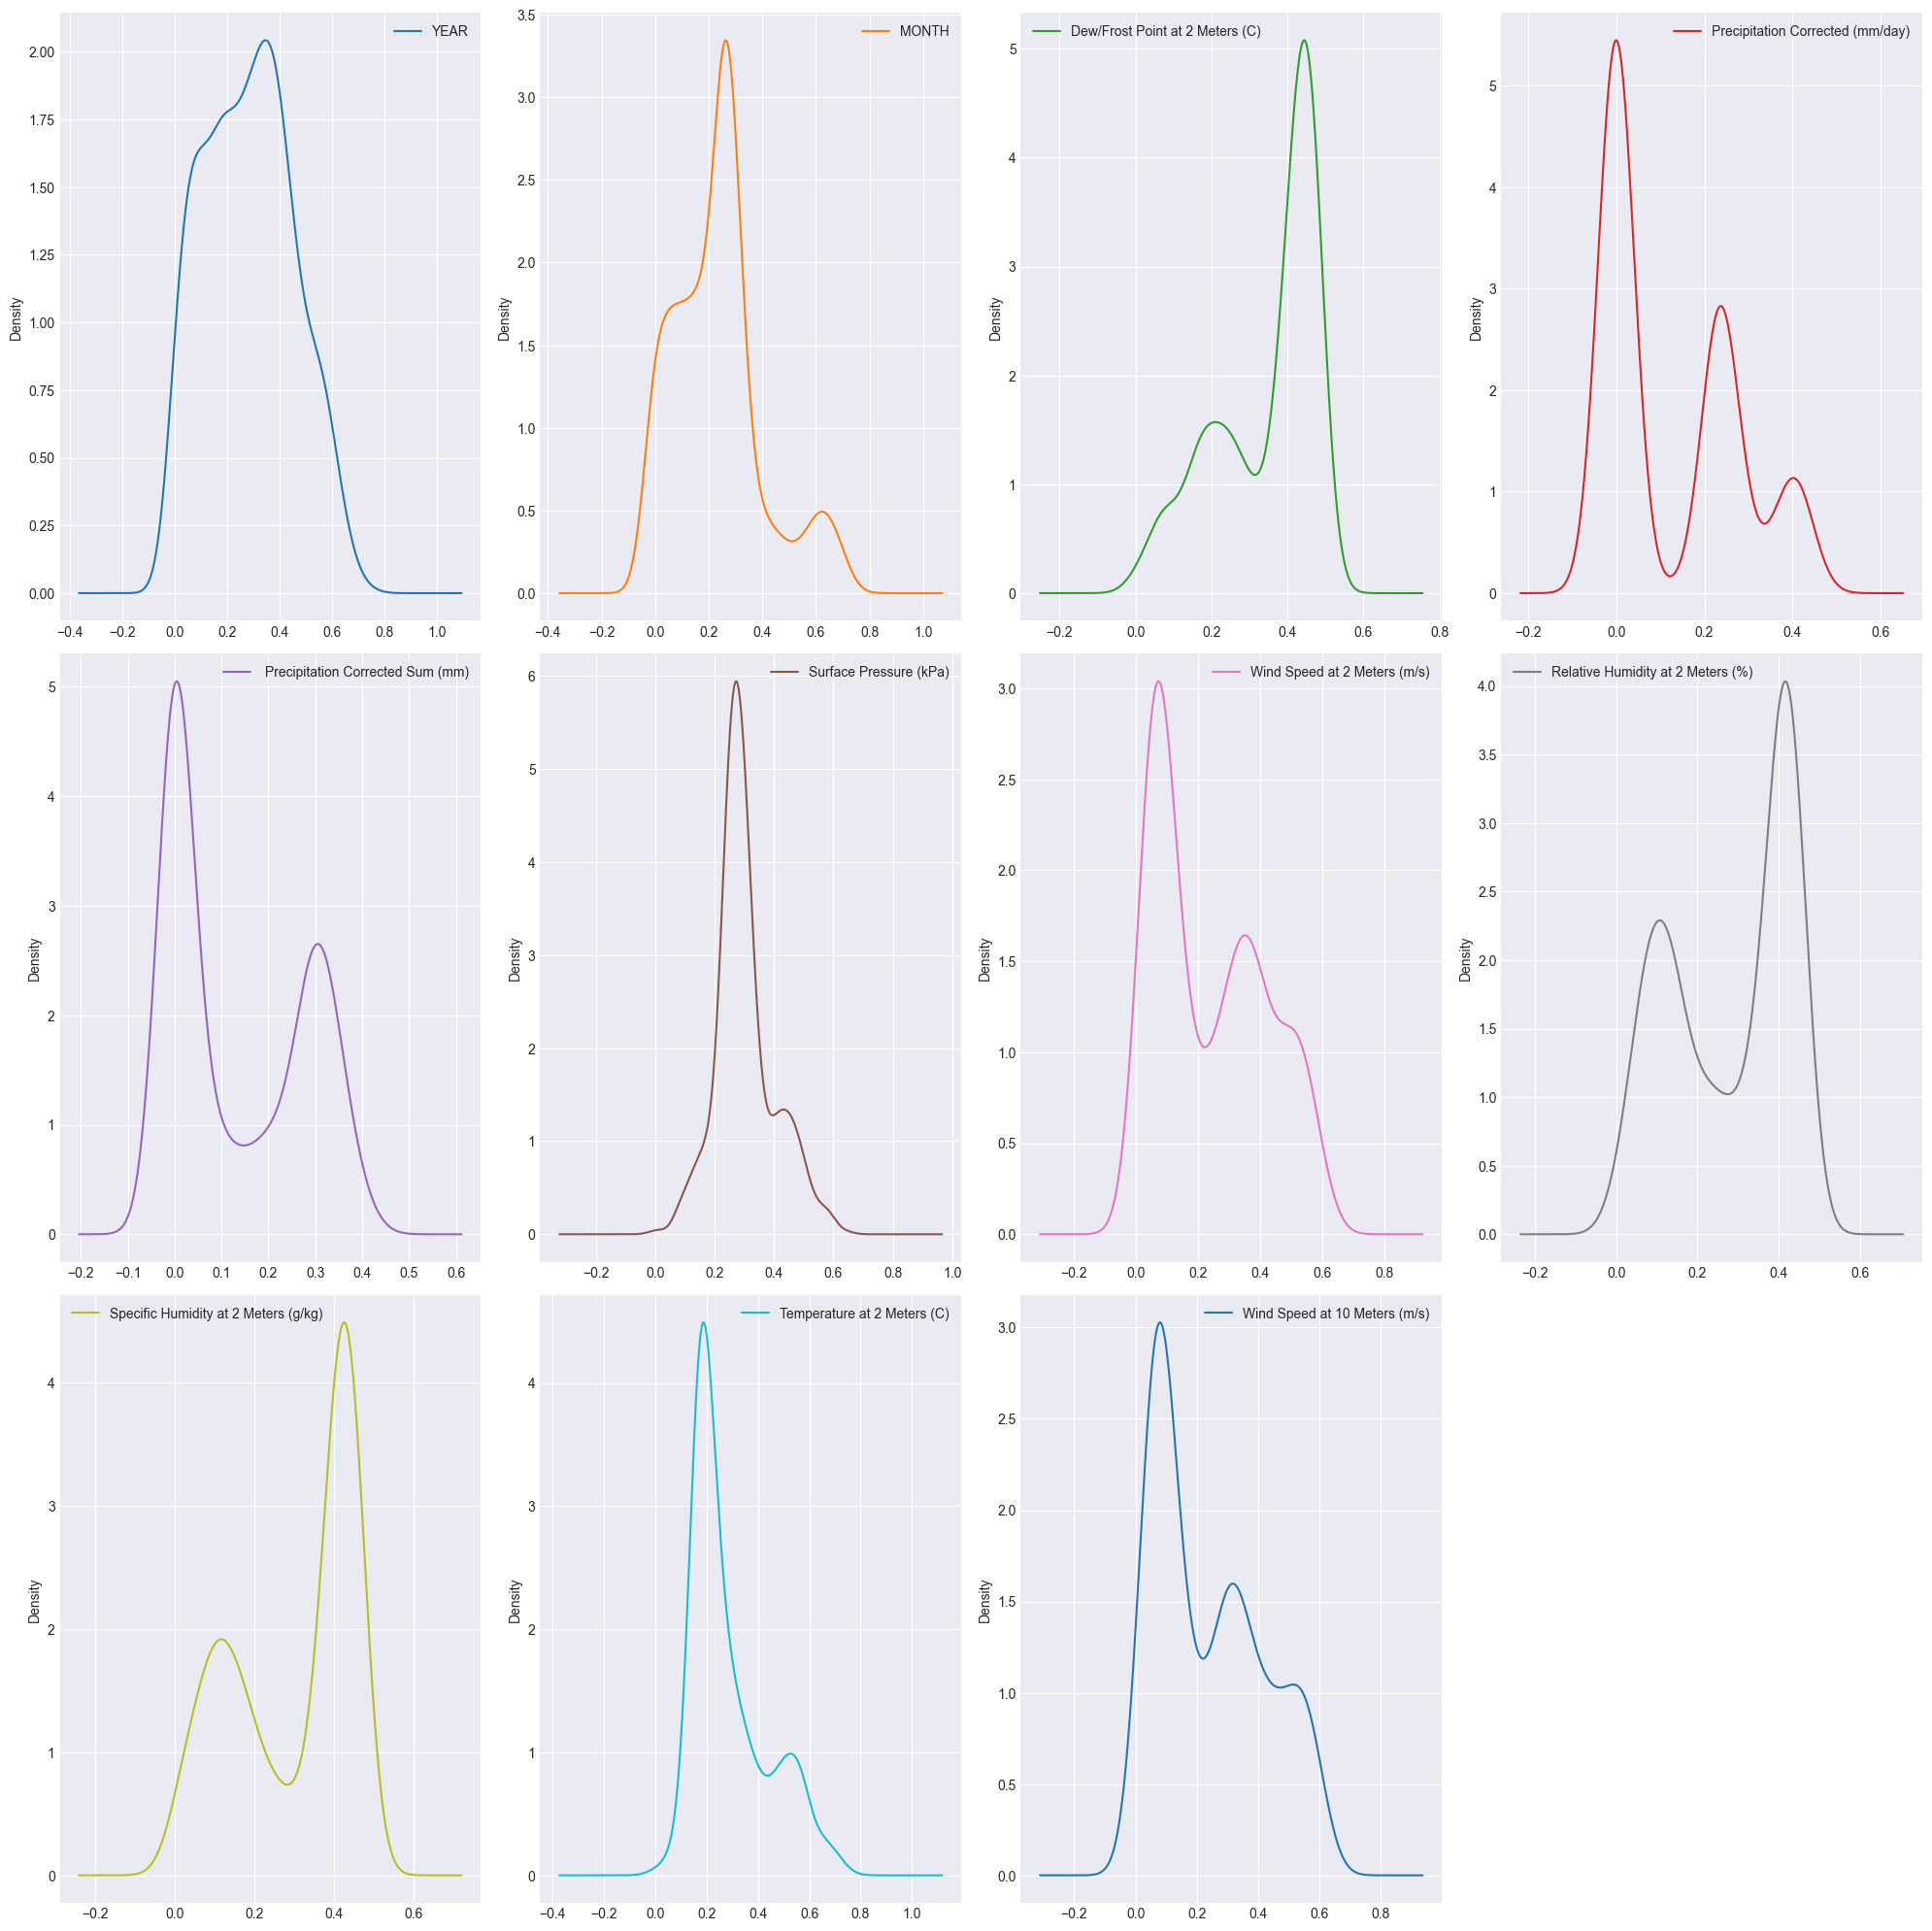

In [85]:
plt.figure(figsize=(25, 20), dpi= 100)
NRX_train_df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

## Multicolinearity

In [86]:
NRX_train_df['class'] = y_train

<Axes: >

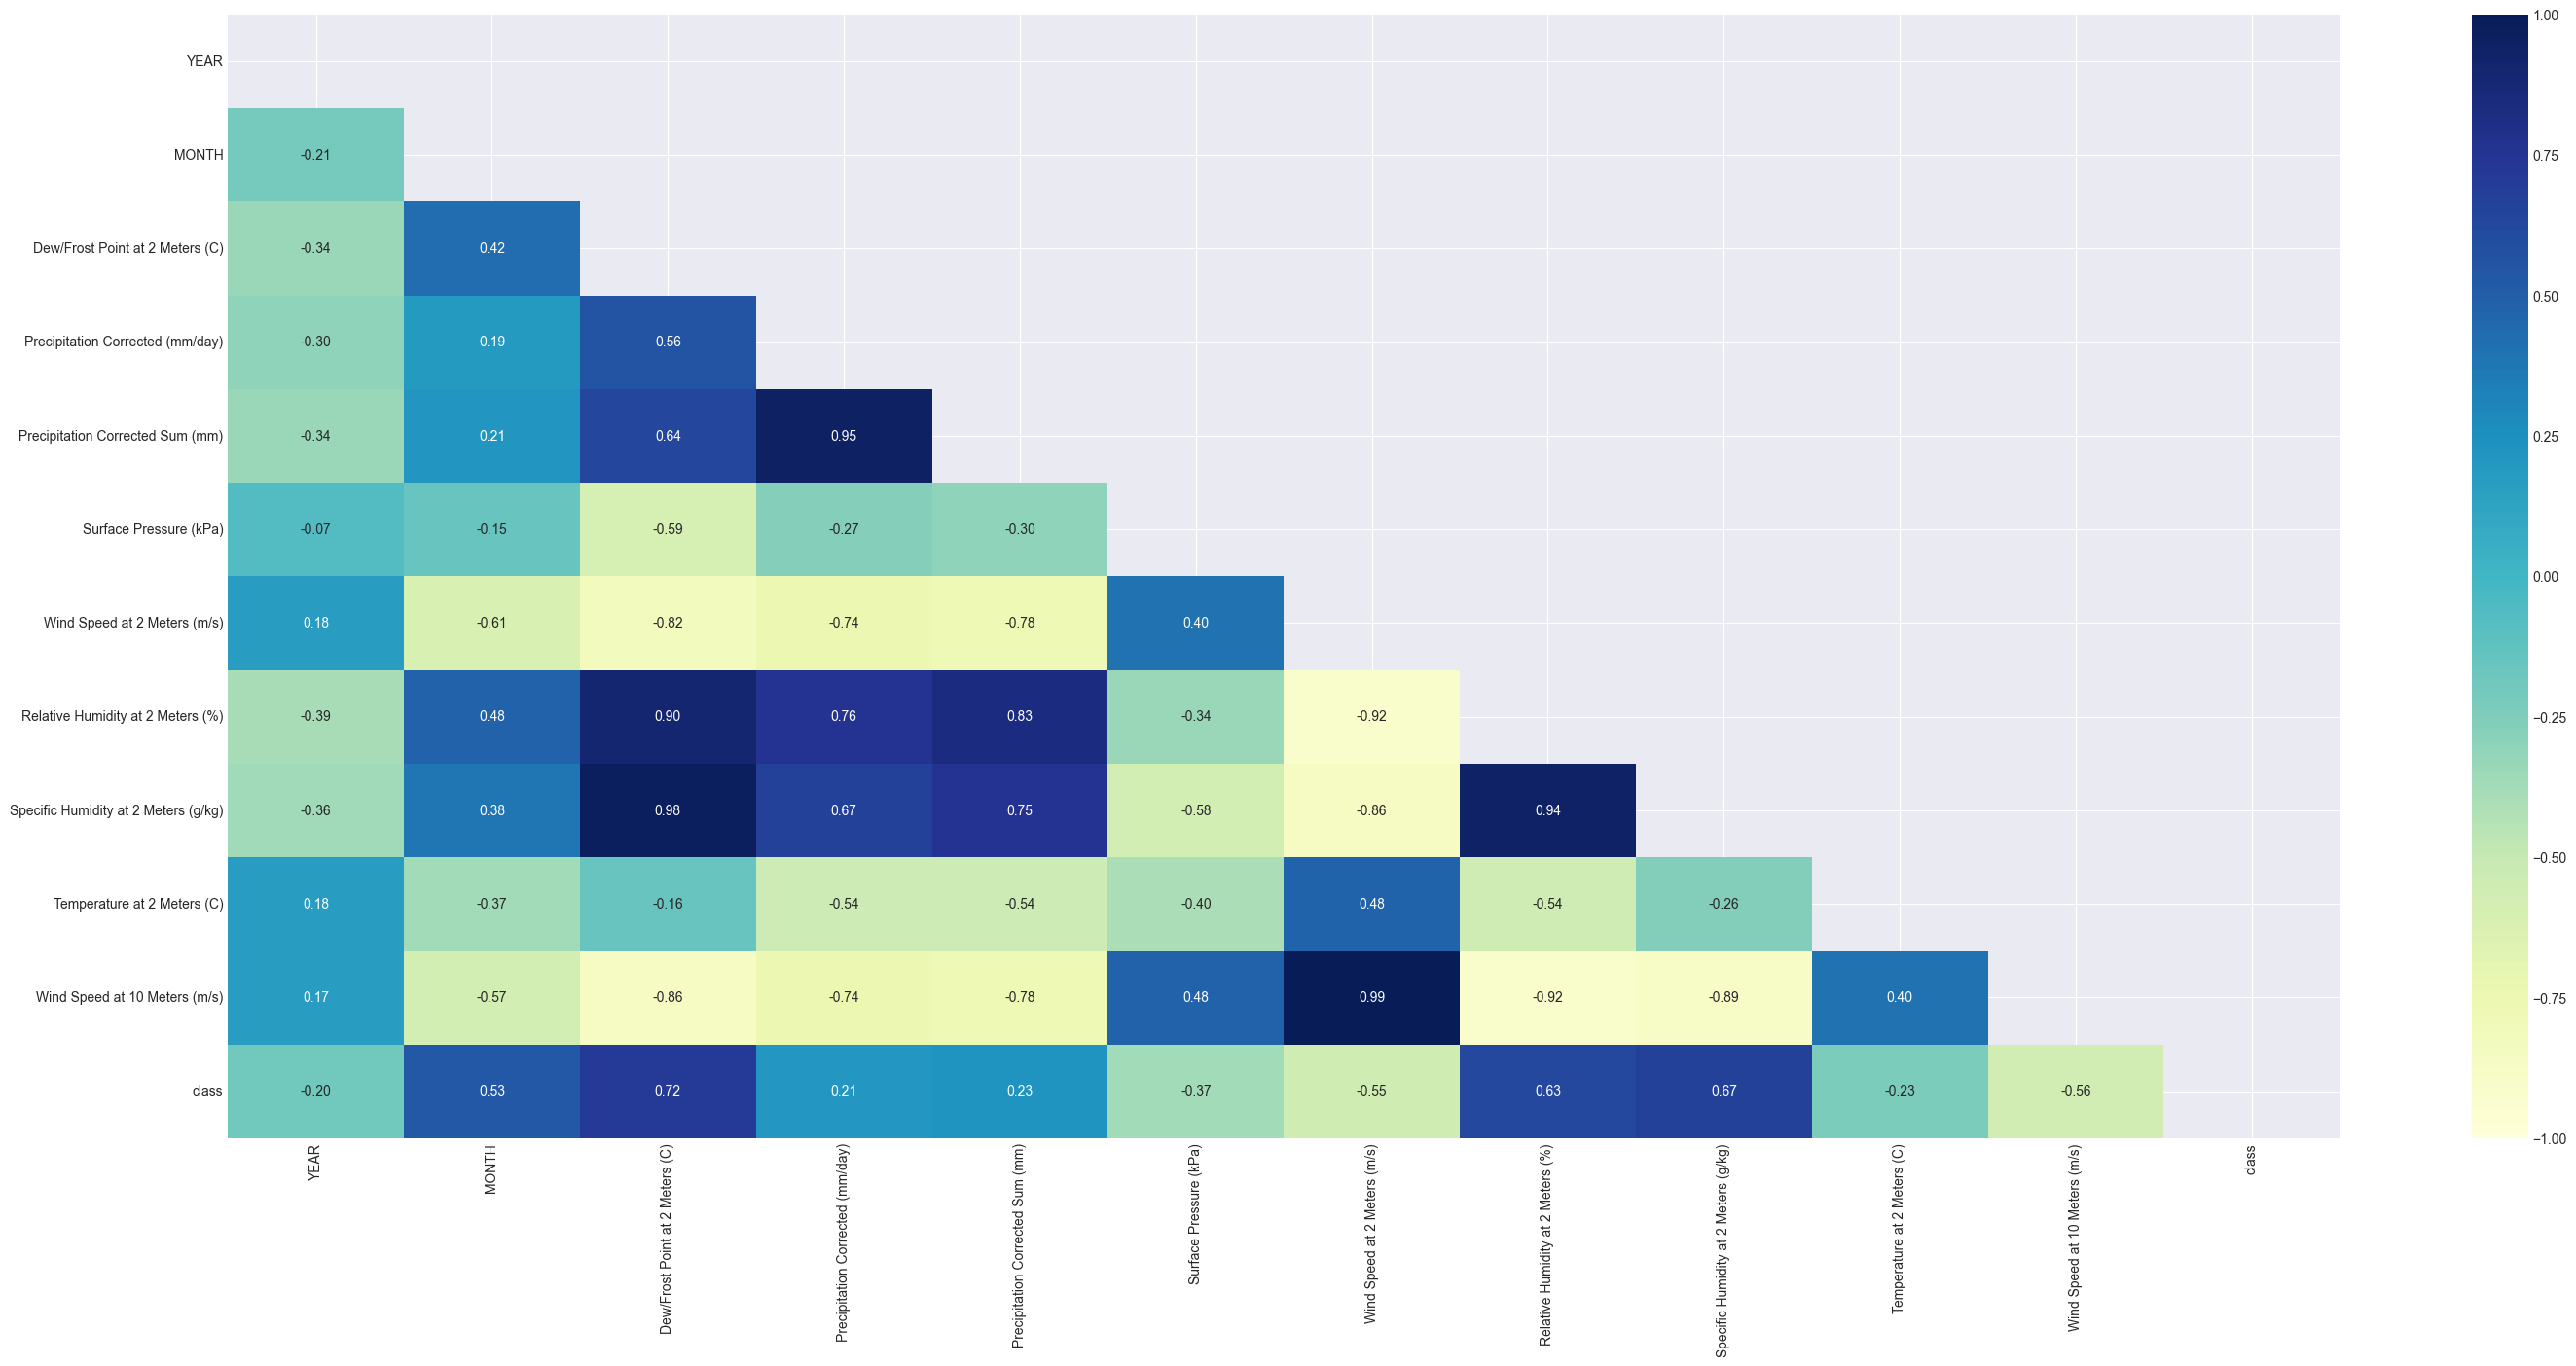

In [87]:
corr = NRX_train_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [88]:
dfi.columns

Index(['YEAR', 'MONTH', 'Dew/Frost Point at 2 Meters (C)',
       'Precipitation Corrected (mm/day)', ' Precipitation Corrected Sum (mm)',
       'Surface Pressure (kPa)', 'Wind Speed at 2 Meters (m/s)',
       'Relative Humidity at 2 Meters (%)',
       'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
       'Wind Speed at 10 Meters (m/s)', 'class'],
      dtype='object')

In [89]:
column2Drop = ['Precipitation Corrected (mm/day)', 'Specific Humidity at 2 Meters (g/kg)', 
               'Dew/Frost Point at 2 Meters (C)', 'Wind Speed at 10 Meters (m/s)','Relative Humidity at 2 Meters (%)']


In [90]:
NRX_train_df.drop(columns = column2Drop, inplace= True)

<Axes: >

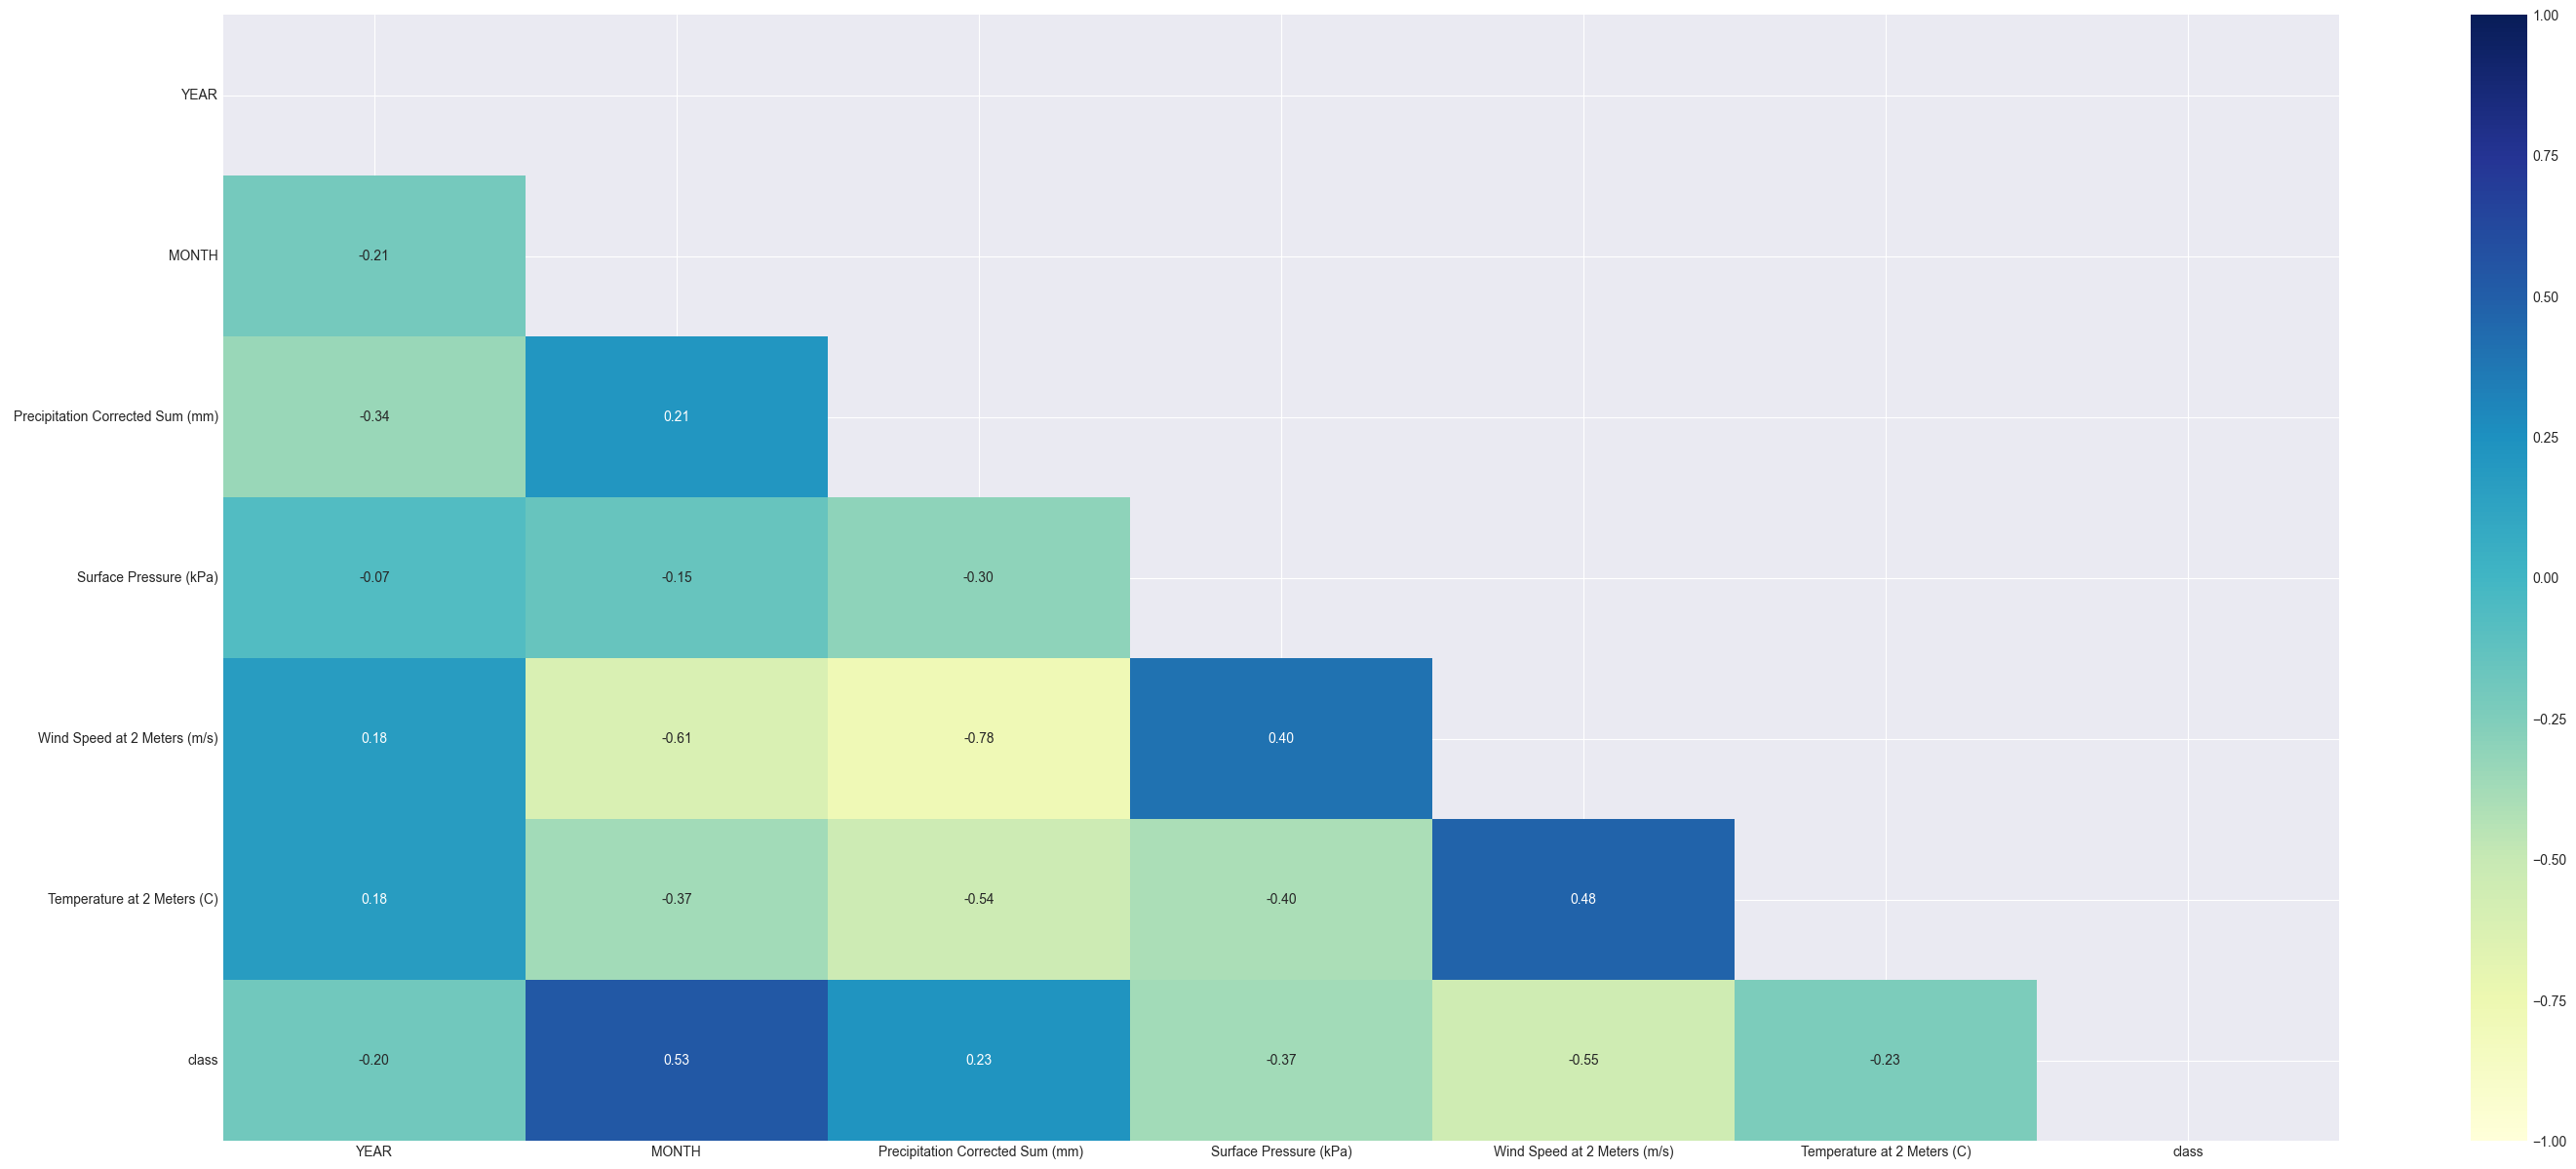

In [91]:
corr = NRX_train_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [92]:
NRX_train_df.drop(columns = ['class'], inplace= True)

In [93]:
NRX_train_df.shape

(679, 6)

In [94]:
from sklearn.feature_selection import RFE
X = NRX_train_df.values
Y = y_train
model = LogisticRegression() 
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False False  True False  True False]
[4 5 1 3 1 2]


In [95]:
RFE_ = [name for name, value in zip(NRX_train_df.columns, fit.ranking_) if value == 1]
len(RFE_)

2

In [96]:
RFE_

[' Precipitation Corrected Sum (mm)', 'Wind Speed at 2 Meters (m/s)']

In [97]:
X_train = NRX_train_df[RFE_].values
X_test = NRX_test_df[RFE_].values

In [98]:
# Spot-Check Classifier Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('Ridge', RidgeClassifier()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.838038 (0.041977)
Ridge: 0.790935 (0.040694)
Lasso: nan (nan)
KNN: 0.908736 (0.031314)
CART: 0.904302 (0.011655)
RF: 0.899890 (0.015658)
SVM: 0.904324 (0.040060)


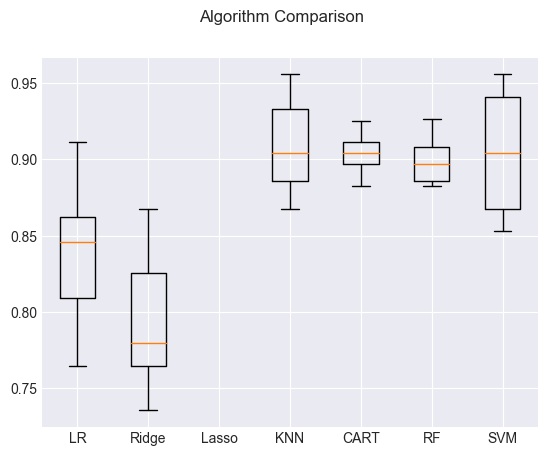

In [99]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [100]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [101]:
# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions, average='micro'))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        61
           1       0.99      0.99      0.99        67
           2       0.87      0.81      0.84        42

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170

F1-score:  0.9235294117647059


In [102]:
cm = confusion_matrix(y_test, predictions)
cm

array([[57,  0,  4],
       [ 0, 66,  1],
       [ 7,  1, 34]], dtype=int64)

In [103]:
def make_prediction(Precipitation, RelativeHumidity):
    data = {
        ' Precipitation Corrected Sum (mm)': Precipitation,
        'Relative Humidity at 2 Meters (%)': RelativeHumidity,
    }
    
    df = pd.DataFrame(data, index=[0])

    

    prediction = model.predict(df)
    
    # Inverse transform the predicted labels
    decoded_prediction = encoder.inverse_transform(prediction)
    
    return f"It is going to be : {decoded_prediction[0]}"
 

In [104]:
make_prediction(0, 40)

'It is going to be : drought'

In [105]:
a_df = dfi[[' Precipitation Corrected Sum (mm)', 'Relative Humidity at 2 Meters (%)', 'class']]
a_df

Precipitation Corrected Sum (mm)  Relative Humidity at 2 Meters (%)  \
0                             0.000000                          40.380000   
1                             0.000000                          25.940000   
2                             0.000000                          19.880000   
3                            15.820000                          45.190000   
4                            73.830000                          61.000000   
..                                 ...                                ...   
844                         256.905525                          84.717880   
845                         273.293975                          84.560614   
846                         265.622540                          84.628719   
847                         257.069603                          83.989656   
848                         205.735472                          79.337177   

       class  
0     normal  
1    drought  
2    drought  
3     normal  
4     normal  
..       ...  
844    flood  
845    flood  
846    flood  
847    flood  
848    flood  

[849 rows x 3 columns]

In [106]:
a_df['predict'] = encoder.inverse_transform(model.predict(
    a_df[[' Precipitation Corrected Sum (mm)', 'Relative Humidity at 2 Meters (%)']]))

In [107]:
a_df[a_df['class'].apply(lambda x : x == 'flood')].head(60)

Precipitation Corrected Sum (mm)  Relative Humidity at 2 Meters (%)  \
7                           226.760000                          81.560000   
19                          200.390000                          85.250000   
31                          247.850000                          81.620000   
54                          205.660000                          75.120000   
55                          279.490000                          85.690000   
67                          295.310000                          83.440000   
79                          221.480000                          82.060000   
80                          205.660000                          82.060000   
102                         221.480000                          76.190000   
103                         237.300000                          83.120000   
115                         232.030000                          81.750000   
116                         205.660000                          81.880000   
139                         200.390000                          81.120000   
151                         200.390000                          80.690000   
163                         305.860000                          83.880000   
186                         232.030000                          79.440000   
198                         200.390000                          72.250000   
199                         253.120000                          84.560000   
211                         337.500000                          84.880000   
223                         242.580000                          80.620000   
235                         258.400000                          83.750000   
247                         263.670000                          85.000000   
259                         226.760000                          81.500000   
270                         200.390000                          80.750000   
271                         284.770000                          83.690000   
295                         216.210000                          80.560000   
307                         232.030000                          84.060000   
308                         253.120000                          82.880000   
331                         284.770000                          83.190000   
343                         216.210000                          84.190000   
355                         284.770000                          82.750000   
367                         326.950000                          83.810000   
379                         269.560000                          83.880000   
389                         209.480000                          71.750000   
390                         205.790000                          77.500000   
391                         296.340000                          84.500000   
392                         249.740000                          85.310000   
603                         250.432867                          84.811874   
604                         228.585666                          80.786362   
605                         246.599962                          83.253187   
606                         240.242194                          81.726916   
607                         251.770538                          84.859437   
608                         249.415556                          85.097480   
609                         234.983706                          82.517851   
610                         276.129798                          85.077516   
611                         228.631850                          82.409286   
612                         232.030000                          82.861655   
613                         253.500126                          84.575854   
614                         332.205610                          84.343033   
615                         226.573990                          81.312933   
616                         211.928731                          74.955545   
61

In [108]:
predictions

array([2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2,
       2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1])

# Flood Prone Areas

In [109]:
data = {
    "Settlement": ["Jawo", "Unguwar Sani", "Makera", "Maurida", "Unguwar Kayi", "U. Mijin Nana",
                   "Unguwar Gero", "Kola", "Wuro Maliki", "Birnin Kebbi", "Ambursa", "Dagere"],
    "Latitude": [12.49750, 12.50550, 12.51389, 12.51972, 12.51472, 12.52722, 12.53056, 12.44528,
                 12.44083, 12.47389, 12.51028, 12.56417],
    "Longitude": [4.092222, 4.104722, 4.119444, 4.127500, 4.152222, 4.150000, 4.179444, 4.116111,
                  4.093056, 4.210000, 4.335000, 4.414167],
    "Elevation": [199.9, 197.8, 201.7, 200.5, 201.1, 202.0, 200.5, 204.5, 199.6, 206.7, 206.7, 205.7]
}

# Create DataFrame
df2 = pd.DataFrame(data)



In [110]:
df2

Settlement  Latitude  Longitude  Elevation
0            Jawo  12.49750   4.092222      199.9
1    Unguwar Sani  12.50550   4.104722      197.8
2          Makera  12.51389   4.119444      201.7
3         Maurida  12.51972   4.127500      200.5
4    Unguwar Kayi  12.51472   4.152222      201.1
5   U. Mijin Nana  12.52722   4.150000      202.0
6    Unguwar Gero  12.53056   4.179444      200.5
7            Kola  12.44528   4.116111      204.5
8     Wuro Maliki  12.44083   4.093056      199.6
9    Birnin Kebbi  12.47389   4.210000      206.7
10        Ambursa  12.51028   4.335000      206.7
11         Dagere  12.56417   4.414167      205.7

In [111]:
map_center = [df2['Latitude'].mean(), df2['Longitude'].mean()]

In [112]:
kebbi_map = folium.Map(location=map_center, zoom_start=10)

In [113]:
kebbi_map

In [114]:
for index, row in df2.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Settlement']}: {row['Elevation']} m",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(kebbi_map)


In [115]:
#kebbi_map.save('kebbi_elevation_map.html')
kebbi_map

In [116]:
df2['Settlement'].unique()

array(['Jawo', 'Unguwar Sani', 'Makera', 'Maurida', 'Unguwar Kayi',
       'U. Mijin Nana', 'Unguwar Gero', 'Kola', 'Wuro Maliki',
       'Birnin Kebbi', 'Ambursa', 'Dagere'], dtype=object)